**Import thư viện**

In [ ]:
import pylab
import pandas                    as pd
import numpy                     as np
import matplotlib.pyplot         as plt
import seaborn                   as sns
import scipy.stats               as st
import seaborn                   as sns
import plotly.express            as px
import plotly.graph_objects      as go
import matplotlib.pyplot         as plt
import statsmodels.api           as sm
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

**Đọc dữ liệu**

In [ ]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Thông tin chi tiết bộ dữ liệu**

In [ ]:
print('CHI TIẾT BỘ DỮ LIỆU')
print(df.info(),'\n')
print('>>> SỐ LƯỢNG PHẦN TỬ TRONG BỘ DỮ LIỆU:', df.size,'\n')
print('>>> SỐ DÒNG VÀ CỘT CỦA BỘ DỮ LIỆU', df.shape,'\n')

CHI TIẾT BỘ DỮ LIỆU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Kiểm tra giá trị thiếu**

In [ ]:
# kiểm tra các giá trị null
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{pct_missing :.1%} - {col}')

0.0% - Invoice ID
0.0% - Branch
0.0% - City
0.0% - Customer type
0.0% - Gender
0.0% - Product line
0.0% - Unit price
0.0% - Quantity
0.0% - Tax 5%
0.0% - Total
0.0% - Date
0.0% - Time
0.0% - Payment
0.0% - cogs
0.0% - gross margin percentage
0.0% - gross income
0.0% - Rating


**Kiểm tra giá trị trùng lặp**

In [ ]:
df.duplicated().sum()

0

**Kiểm tra số dòng, số cột bộ dữ liệu**

In [ ]:
shape=df.shape
print('Số dòng : ',shape[0])
print('Số cột : ',shape[1])

Số dòng :  1000
Số cột :  17


**Xác định biến phân loại, biến số**

In [ ]:
categorical = []
numeric = []
for i in range(0,df.shape[1]):
  if df.iloc[:,i].dtypes == 'int64' or df.iloc[:,i].dtypes == 'float64':
    numeric.append(df.columns[i])
  else:
    categorical.append(df.columns[i])
print('\nCác biến phân loại của dataset bao gồm:')
for i in range(0,len(categorical)):
  if i == len(categorical) - 1:
    print(categorical[i],end='.')
  else:
    print(categorical[i],end=', ')
print('\n\nCác biến số của dataset bao gồm:')
for i in range(0,len(numeric)):
  if i == len(numeric) - 1:
    print(numeric[i],end='.')
  else:
    print(numeric[i],end=', ')


Các biến phân loại của dataset bao gồm:
Invoice ID, Branch, City, Customer type, Gender, Product line, Date, Time, Payment.

Các biến số của dataset bao gồm:
Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage, gross income, Rating.

In [ ]:
numerical_features = df.drop(['Invoice ID','Branch','City','Customer type','Gender','Product line','Payment','Rating','Date','Time'], axis = 1)

In [ ]:
numerical_features

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085
...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910


In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'Unit price\':\n')
print(df['Unit price'].describe())

Các thông số xác suất của biến 'Unit price':

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến Unit price')

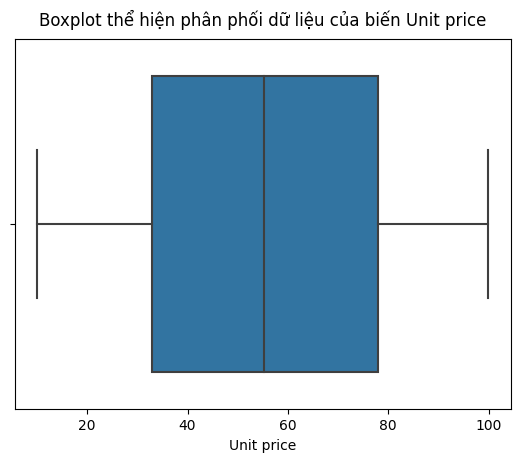

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['Unit price'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến Unit price',pad=10)

In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'Quantity\':\n')
print(df['Quantity'].describe())

Các thông số xác suất của biến 'Quantity':

count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến Quantity')

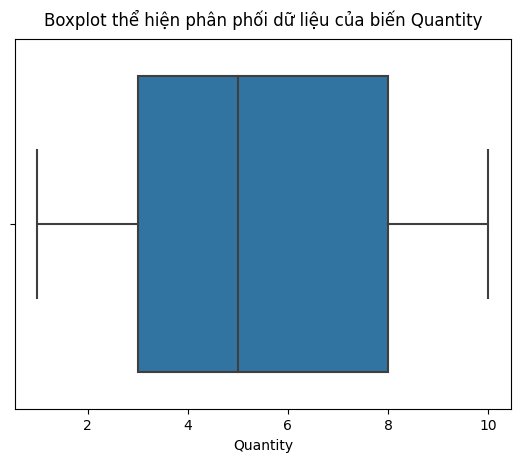

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['Quantity'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến Quantity',pad=10)

In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'Tax 5%\':\n')
print(df['Tax 5%'].describe())

Các thông số xác suất của biến 'Tax 5%':

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến Tax 5%')

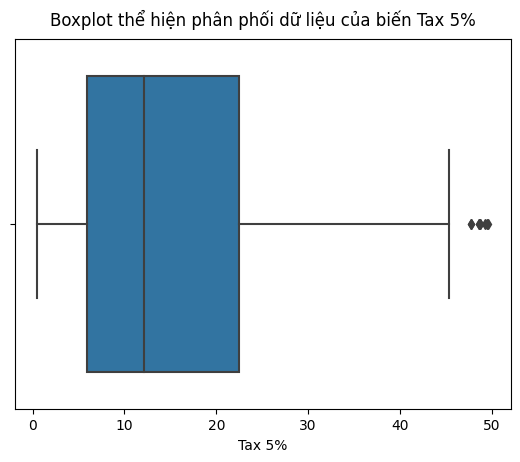

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['Tax 5%'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến Tax 5%',pad=10)

In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'Total\':\n')
print(df['Total'].describe())

Các thông số xác suất của biến 'Total':

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến Total')

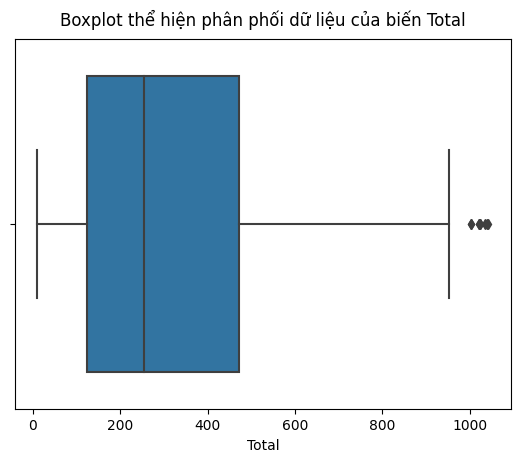

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['Total'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến Total',pad=10)

In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'cogs\':\n')
print(df['cogs'].describe())

Các thông số xác suất của biến 'cogs':

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến cogs')

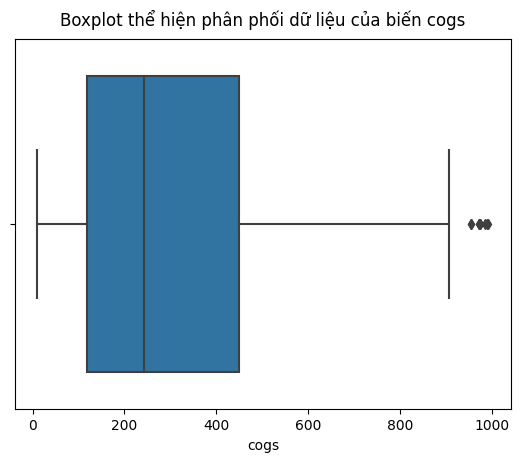

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['cogs'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến cogs',pad=10)

In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'gross margin percentage\':\n')
print(df['gross margin percentage'].describe())

Các thông số xác suất của biến 'gross margin percentage':

count    1000.000000
mean        4.761905
std         0.000000
min         4.761905
25%         4.761905
50%         4.761905
75%         4.761905
max         4.761905
Name: gross margin percentage, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến gross margin percentage')

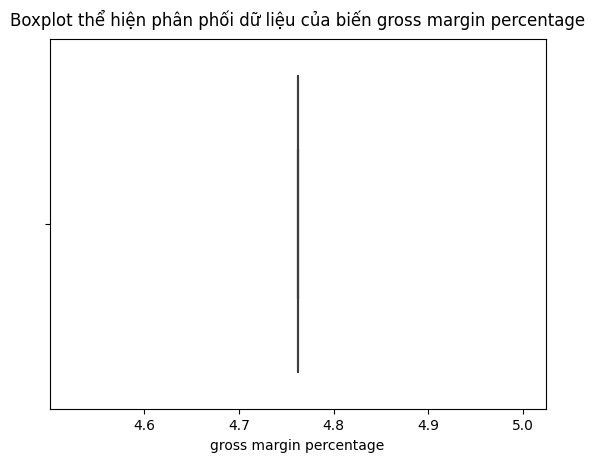

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['gross margin percentage'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến gross margin percentage',pad=10)

In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'gross income\':\n')
print(df['gross income'].describe())

Các thông số xác suất của biến 'gross income':

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến gross income')

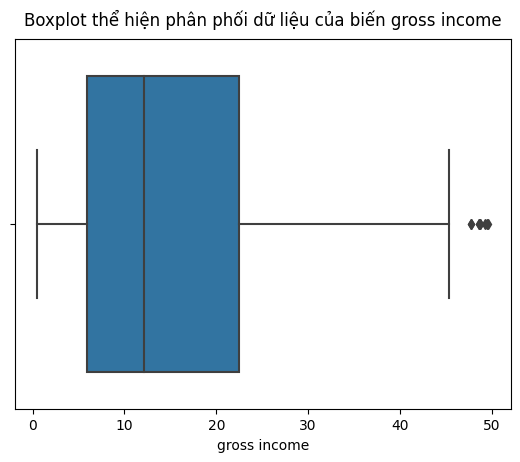

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['gross income'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến gross income',pad=10)

In [ ]:
# Các thông số xác suất đánh giá thuộc tính
print('Các thông số xác suất của biến \'Rating\':\n')
print(df['Rating'].describe())

Các thông số xác suất của biến 'Rating':

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64


Text(0.5, 1.0, 'Boxplot thể hiện phân phối dữ liệu của biến Rating')

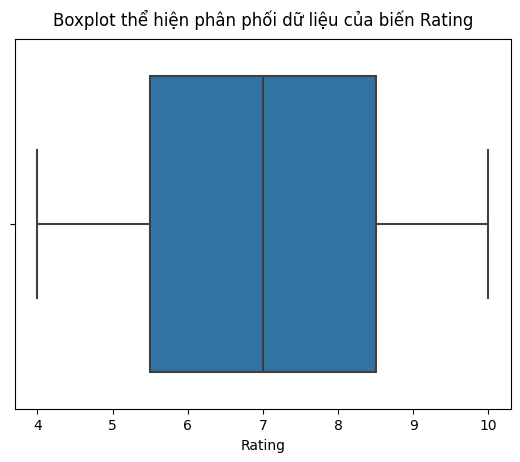

In [ ]:
## Vẽ boxplot quan sát outliers
sns.boxplot(x=df['Rating'],orient='h')
plt.grid(False)
plt.title('Boxplot thể hiện phân phối dữ liệu của biến Rating',pad=10)

In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'Branch\':')
print(df.Branch.describe())
print('Các giá trị unique của biến \'Branch\' cụ thể là:',df.Branch.unique())

Các thông số xác suất của biến 'Branch':
count     1000
unique       3
top          A
freq       340
Name: Branch, dtype: object
Các giá trị unique của biến 'Branch' cụ thể là: ['A' 'C' 'B']


In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'City\':')
print(df.City.describe())
print('Các giá trị unique của biến \'City\' cụ thể là:',df.City.unique())

Các thông số xác suất của biến 'City':
count       1000
unique         3
top       Yangon
freq         340
Name: City, dtype: object
Các giá trị unique của biến 'City' cụ thể là: ['Yangon' 'Naypyitaw' 'Mandalay']


In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'Customer type\':')
print(df['Customer type'].describe())
print('Các giá trị unique của biến \'Customer type\' cụ thể là:',df['Customer type'].unique())

Các thông số xác suất của biến 'Customer type':
count       1000
unique         2
top       Member
freq         501
Name: Customer type, dtype: object
Các giá trị unique của biến 'Customer type' cụ thể là: ['Member' 'Normal']


In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'Gender\':')
print(df.Gender.describe())
print('Các giá trị unique của biến \'Gender\' cụ thể là:',df.Gender.unique())

Các thông số xác suất của biến 'Gender':
count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object
Các giá trị unique của biến 'Gender' cụ thể là: ['Female' 'Male']


In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'Product_line\':')
print(df['Product line'].describe())
print('Các giá trị unique của biến \'Product_line\' cụ thể là:',df['Product line'].unique())

Các thông số xác suất của biến 'Product_line':
count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object
Các giá trị unique của biến 'Product_line' cụ thể là: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'Payment\':')
print(df.Payment.describe())
print('Các giá trị unique của biến \'Payment\' cụ thể là:',df.Payment.unique())

Các thông số xác suất của biến 'Payment':
count        1000
unique          3
top       Ewallet
freq          345
Name: Payment, dtype: object
Các giá trị unique của biến 'Payment' cụ thể là: ['Ewallet' 'Cash' 'Credit card']


In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'Date\':')
print(df.Date.describe())
print('Các giá trị unique của biến \'Date\' cụ thể là:',df.Date.unique())

Các thông số xác suất của biến 'Date':
count         1000
unique          89
top       2/7/2019
freq            20
Name: Date, dtype: object
Các giá trị unique của biến 'Date' cụ thể là: ['1/5/2019' '3/8/2019' '3/3/2019' '1/27/2019' '2/8/2019' '3/25/2019'
 '2/25/2019' '2/24/2019' '1/10/2019' '2/20/2019' '2/6/2019' '3/9/2019'
 '2/12/2019' '2/7/2019' '3/29/2019' '1/15/2019' '3/11/2019' '1/1/2019'
 '1/21/2019' '3/5/2019' '3/15/2019' '2/17/2019' '3/2/2019' '3/22/2019'
 '3/10/2019' '1/25/2019' '1/28/2019' '1/7/2019' '3/23/2019' '1/17/2019'
 '2/2/2019' '3/4/2019' '3/16/2019' '2/27/2019' '2/10/2019' '3/19/2019'
 '2/3/2019' '3/7/2019' '2/28/2019' '3/27/2019' '1/20/2019' '3/12/2019'
 '2/15/2019' '3/6/2019' '2/14/2019' '3/13/2019' '1/24/2019' '1/6/2019'
 '2/11/2019' '1/22/2019' '1/13/2019' '1/9/2019' '1/12/2019' '1/26/2019'
 '1/23/2019' '2/23/2019' '1/2/2019' '2/9/2019' '3/26/2019' '3/1/2019'
 '2/1/2019' '3/28/2019' '3/24/2019' '2/5/2019' '1/19/2019' '1/16/2019'
 '1/8/2019' '2/18/2019' '1/18/201

In [ ]:
# Các thông số quan sát thuộc tính
print('Các thông số xác suất của biến \'Time\':')
print(df.Time.describe())
print('Các giá trị unique của biến \'Time\' cụ thể là:',df.Time.unique())

Các thông số xác suất của biến 'Time':
count      1000
unique      506
top       19:48
freq          7
Name: Time, dtype: object
Các giá trị unique của biến 'Time' cụ thể là: ['13:08' '10:29' '13:23' '20:33' '10:37' '18:30' '14:36' '11:38' '17:15'
 '13:27' '18:07' '17:03' '10:25' '16:48' '19:21' '16:19' '11:03' '10:39'
 '18:00' '15:30' '11:24' '10:40' '12:20' '11:15' '17:36' '19:20' '15:31'
 '12:17' '19:48' '15:36' '19:39' '12:43' '14:49' '10:12' '10:42' '12:28'
 '19:15' '17:17' '13:24' '13:01' '18:45' '10:11' '13:03' '20:39' '19:47'
 '17:24' '15:47' '12:45' '17:08' '10:19' '15:10' '14:42' '15:46' '11:49'
 '19:01' '11:26' '11:28' '15:55' '20:36' '17:47' '10:55' '13:40' '12:27'
 '14:35' '16:40' '15:43' '15:01' '10:04' '18:50' '12:46' '18:17' '18:21'
 '17:04' '14:20' '15:48' '16:24' '18:56' '19:56' '18:37' '10:17' '14:31'
 '10:23' '20:35' '16:57' '17:55' '19:54' '16:42' '12:09' '20:05' '20:38'
 '13:11' '10:16' '18:14' '13:22' '11:27' '16:44' '18:19' '14:50' '20:54'
 '20:19' '10:43' '14:3

In [ ]:
#Xây dựng hàm để ước lượng giá trị kỳ vọng, phương sai, percentiles, và các thống kê khác
def bootstrap_fun(sample, fn, m, alpha):

    # Lấy giá trị trung bình, độ lệch chuẩn và kích thước mẫu gốc
    sample_mean = sample.mean()
    sample_std = sample.std()
    n = len(sample)

    # Danh sách phân phối Bootstrap (trung bình)
    bootstrap_dist = []

    # Vòng lặp để lấy giá trị ngẫu nhiên từ mẫu với sự thay thế, tính giá trị trung bình và thêm vào danh sách
    for i in range(m):
        replacement = np.random.choice(sample, n, replace=True)
        estimator = fn(replacement)
        bootstrap_dist.append(estimator)

    # Tính giá trị trung bình, độ lệch chuẩn và sai số sau khi thực hiện Bootstrap
    bootstrap_mean = fn(bootstrap_dist)
    bootstrap_se = np.std(bootstrap_dist)
    bias = bootstrap_mean - sample_mean

    # Tính khoảng tin cậy
    percentile_high = 100 * (1 - alpha / 2)
    percentile_low = 100 * (alpha / 2)

    high = np.percentile(bootstrap_dist, percentile_high)
    median = np.percentile(bootstrap_dist, 50)
    low = np.percentile(bootstrap_dist, percentile_low)

    # In kết quả
    print(f'Mean mẫu gốc: {sample_mean}, với độ lệch chuẩn: {sample_std}')
    print('----')
    print(f'Mean sau khi thực hiện Bootstrap: {bootstrap_mean}, với độ lệch chuẩn: {bootstrap_se}')
    print('----')
    print(f'Sai số: {bias}')
    print('----')
    print(f'Khoảng tin cậy {1-alpha:.0%}:\n [{low:.3f} .. {median:.3f} .. {high:.3f}]')

    #Hiển thị kết quả
    fig, ax = plt.subplots(figsize=(14,7))
    sns.histplot(bootstrap_dist, bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
    sns.kdeplot(bootstrap_dist, color = 'black')

    ax.grid(axis = 'y', alpha = 0.5)
    plt.axvline(bootstrap_mean, color = 'red')
    plt.axvline(high, color = 'blue')
    plt.axvline(low, color = 'blue')
    plt.plot()

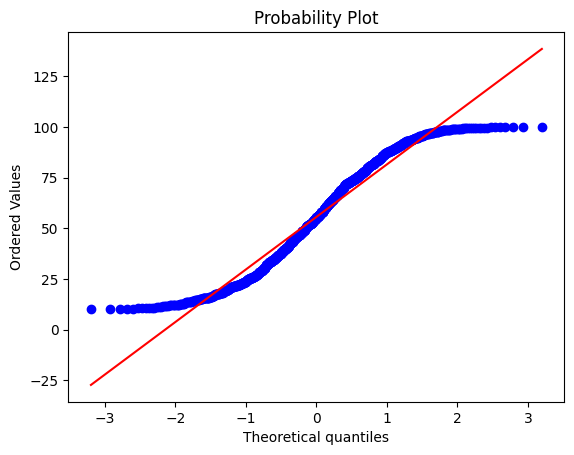

In [ ]:
#Kiểm tra độ lệch của dữ liệu với biểu đồ qq-plot.
st.probplot(df['Unit price'], dist = 'norm', plot = pylab)
pylab.show()

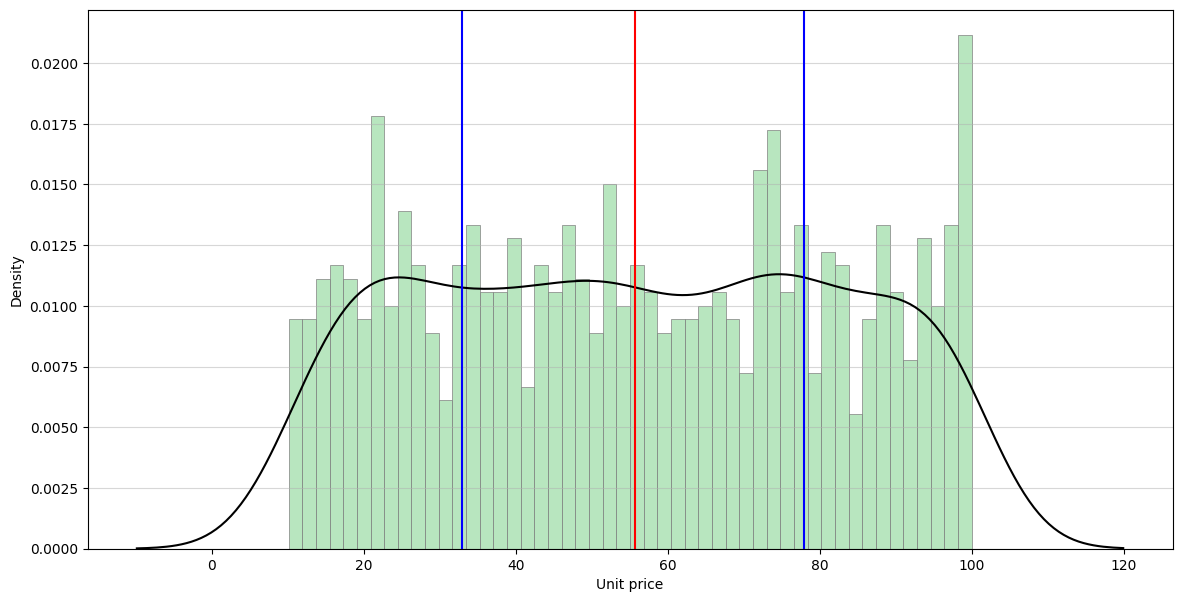

In [ ]:
#Trực quan hóa dữ liệu để thấy độ lệch của dữ liệu
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(df['Unit price'], bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
sns.kdeplot(df['Unit price'], color = 'black')

ax.grid(axis = 'y', alpha = 0.5)
plt.axvline(df['Unit price'].mean(), color = 'red')
plt.axvline(df['Unit price'].quantile(0.25), color = 'blue')
plt.axvline(df['Unit price'].quantile(0.75), color = 'blue')

plt.show()

Mean mẫu gốc: 55.67213, với độ lệch chuẩn: 26.49462834791978
----
Mean sau khi thực hiện Bootstrap: 55.664400240000006, với độ lệch chuẩn: 0.8180378193651822
----
Sai số: -0.007729759999996588
----
Khoảng tin cậy 95%:
 [54.053 .. 55.668 .. 57.235]


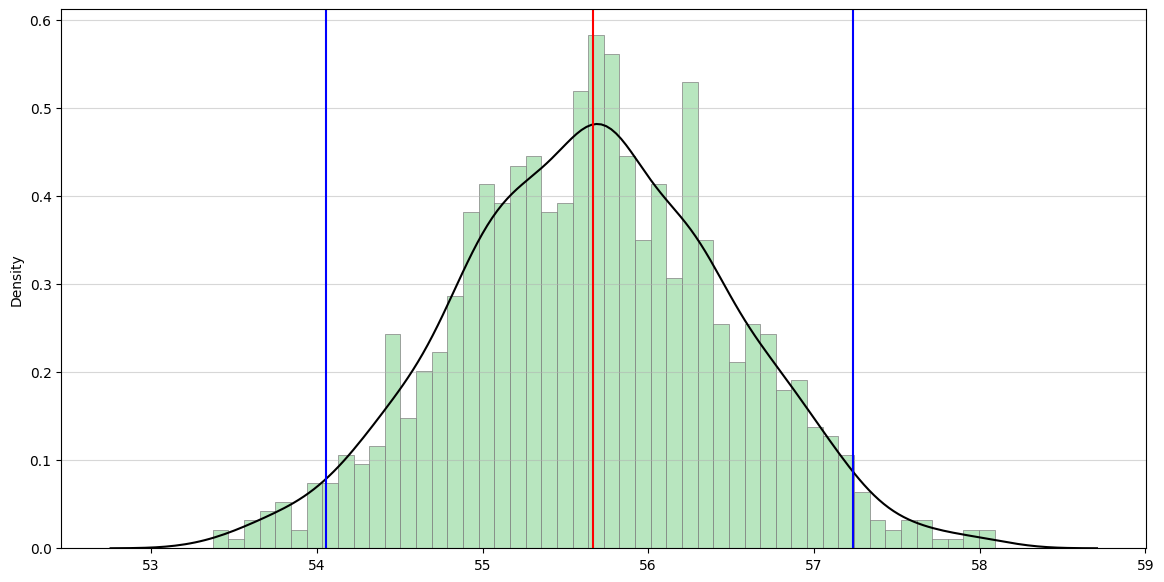

In [ ]:
#Áp dụng thuật toán bootstrap.
bootstrap_fun(df['Unit price'], np.mean,1000, 0.05)

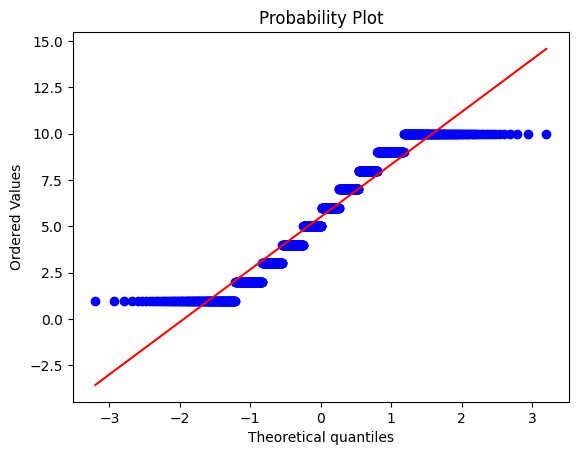

In [ ]:
#Kiểm tra độ lệch của dữ liệu với biểu đồ qq-plot
st.probplot(df['Quantity'], dist = 'norm', plot = pylab)
pylab.show()

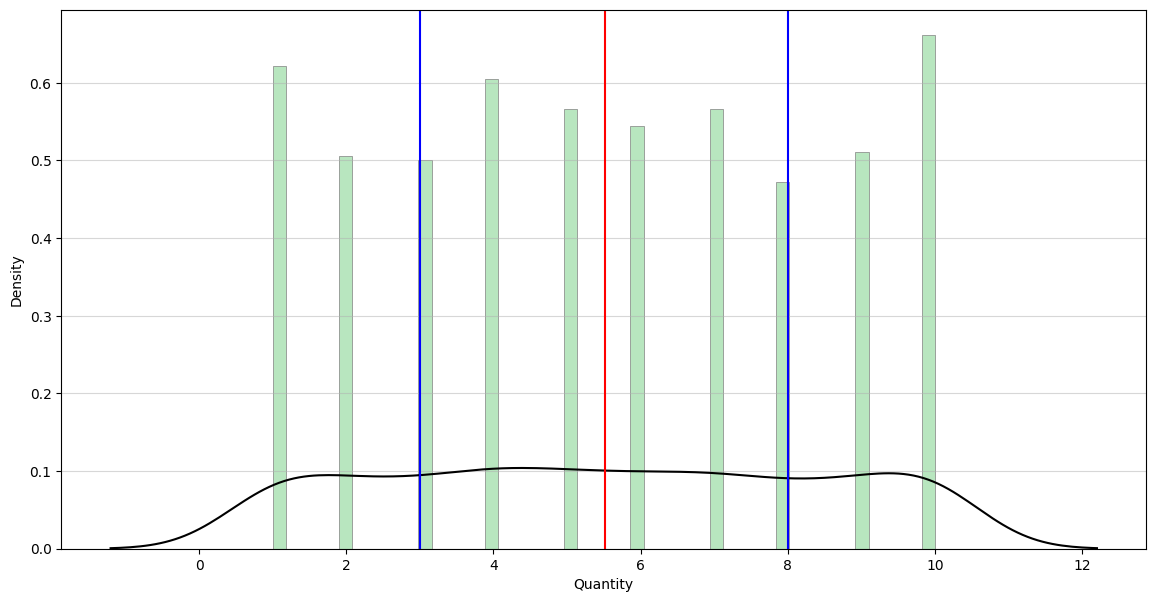

In [ ]:
#Trực quan hóa dữ liệu để thấy độ lệch của dữ
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(df['Quantity'], bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
sns.kdeplot(df['Quantity'], color = 'black')

ax.grid(axis = 'y', alpha = 0.5)
plt.axvline(df['Quantity'].mean(), color = 'red')
plt.axvline(df['Quantity'].quantile(0.25), color = 'blue')
plt.axvline(df['Quantity'].quantile(0.75), color = 'blue')

plt.show()

Mean mẫu gốc: 5.51, với độ lệch chuẩn: 2.923430595455696
----
Mean sau khi thực hiện Bootstrap: 5.509612999999999, với độ lệch chuẩn: 0.09141370373745941
----
Sai số: -0.00038700000000080337
----
Khoảng tin cậy 95%:
 [5.337 .. 5.508 .. 5.678]


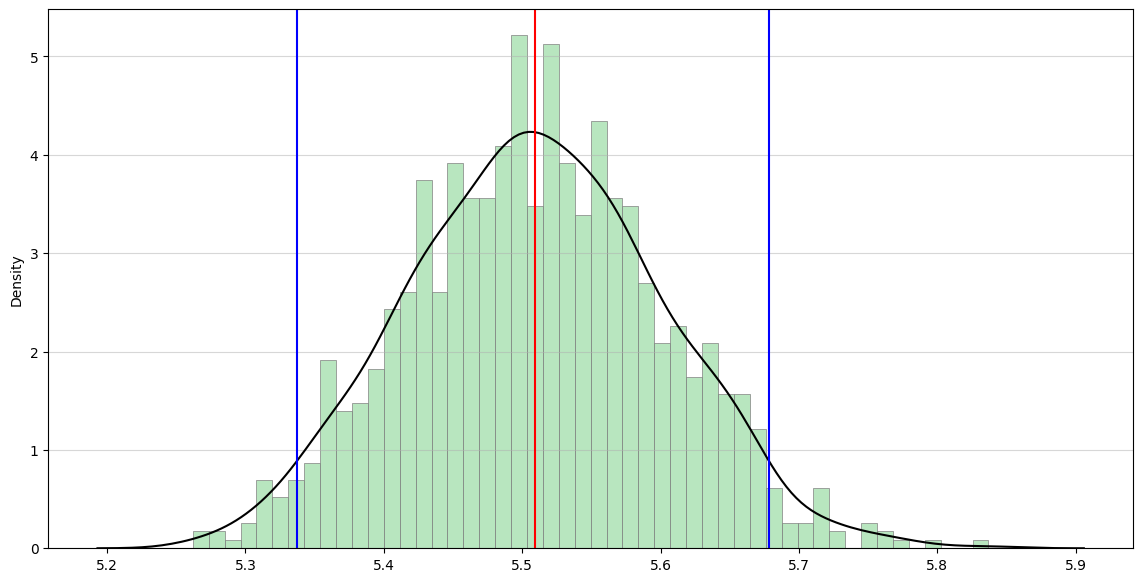

In [ ]:
#Áp dụng thực toán
bootstrap_fun(df['Quantity'], np.mean,1000, 0.05)

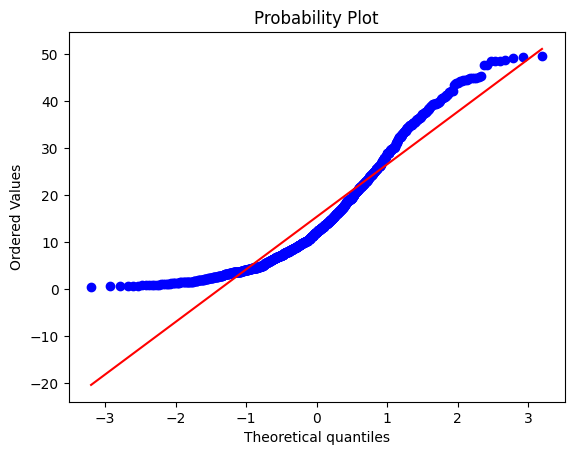

In [ ]:
#Kiểm tra độ lệch của dữ liệu với biểu đồ qq-plot
st.probplot(df['Tax 5%'], dist = 'norm', plot = pylab)
pylab.show()

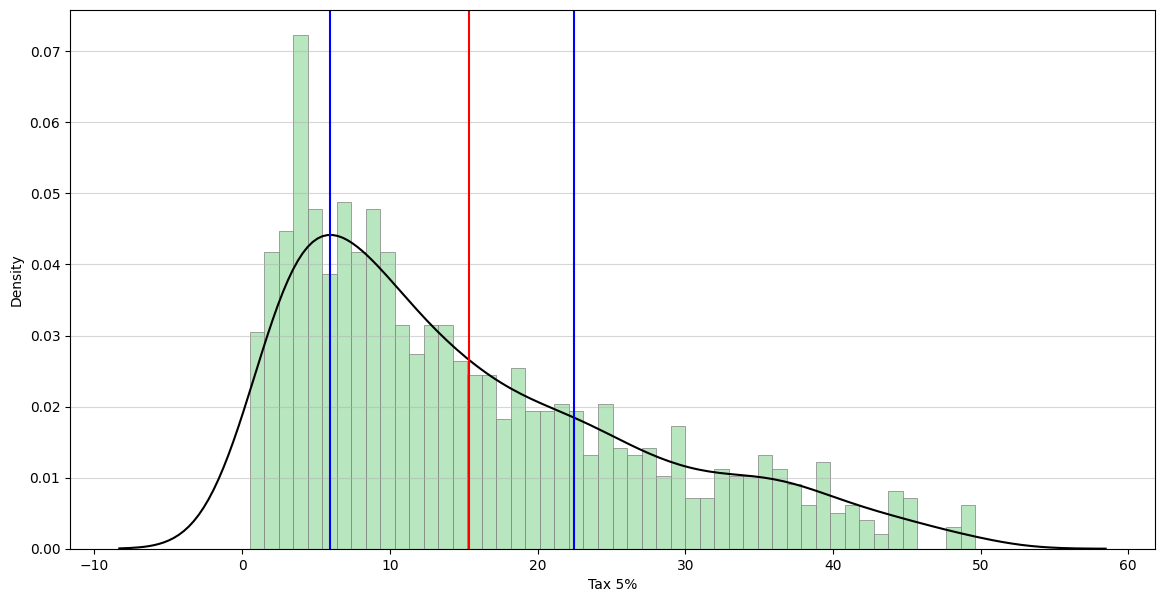

In [ ]:
#Trực quan hóa dữ liệu để thấy độ lệch của dữ liệu
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(df['Tax 5%'], bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
sns.kdeplot(df['Tax 5%'], color = 'black')

ax.grid(axis = 'y', alpha = 0.5)
plt.axvline(df['Tax 5%'].mean(), color = 'red')
plt.axvline(df['Tax 5%'].quantile(0.25), color = 'blue')
plt.axvline(df['Tax 5%'].quantile(0.75), color = 'blue')

plt.show()

Mean mẫu gốc: 15.379368999999999, với độ lệch chuẩn: 11.708825480998659
----
Mean sau khi thực hiện Bootstrap: 15.352387389500002, với độ lệch chuẩn: 0.3681621653527689
----
Sai số: -0.026981610499996478
----
Khoảng tin cậy 95%:
 [14.675 .. 15.345 .. 16.115]


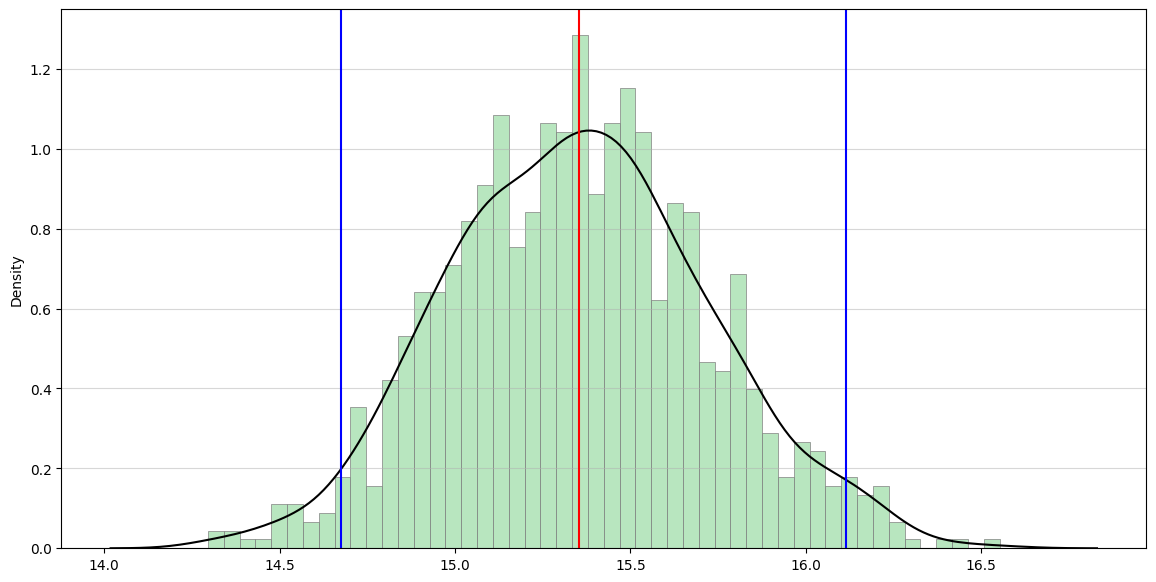

In [ ]:
#Áp dụng thuật toán bootstrap
bootstrap_fun(df['Tax 5%'], np.mean,1000, 0.05)

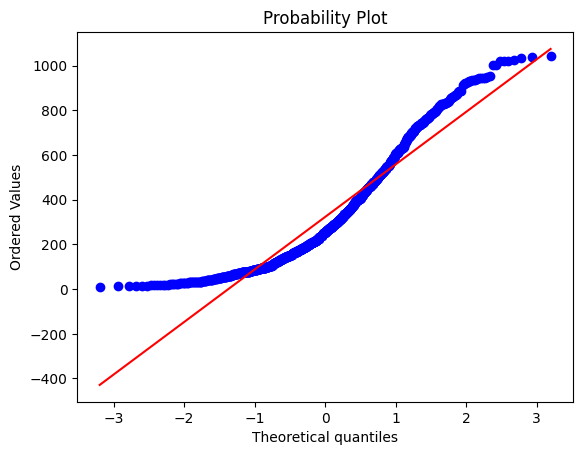

In [ ]:
#Kiểm tra độ lệch của dữ liệu với biểu đồ qq-plot
st.probplot(df['Total'], dist = 'norm', plot = pylab)
pylab.show()

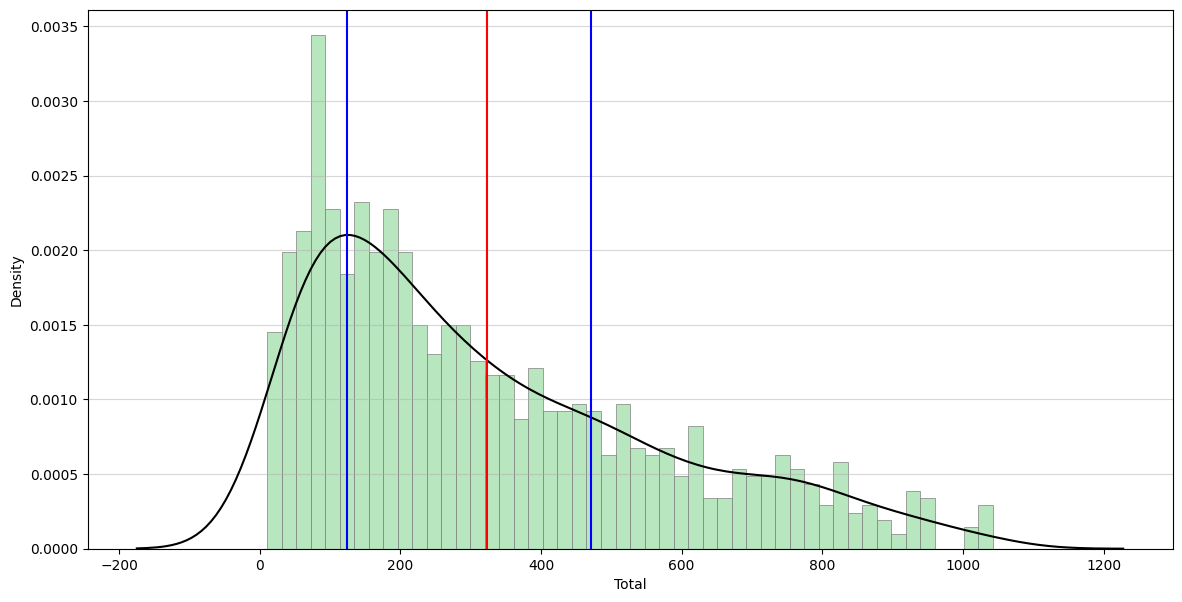

In [ ]:
#Trực quan hóa dữ liệu để thấy độ lệch của dữ
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(df['Total'], bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
sns.kdeplot(df['Total'], color = 'black')

ax.grid(axis = 'y', alpha = 0.5)
plt.axvline(df['Total'].mean(), color = 'red')
plt.axvline(df['Total'].quantile(0.25), color = 'blue')
plt.axvline(df['Total'].quantile(0.75), color = 'blue')

plt.show()

Mean mẫu gốc: 322.966749, với độ lệch chuẩn: 245.88533510097187
----
Mean sau khi thực hiện Bootstrap: 322.72164424500005, với độ lệch chuẩn: 7.9494874983510195
----
Sai số: -0.245104754999943
----
Khoảng tin cậy 95%:
 [307.552 .. 322.723 .. 338.280]


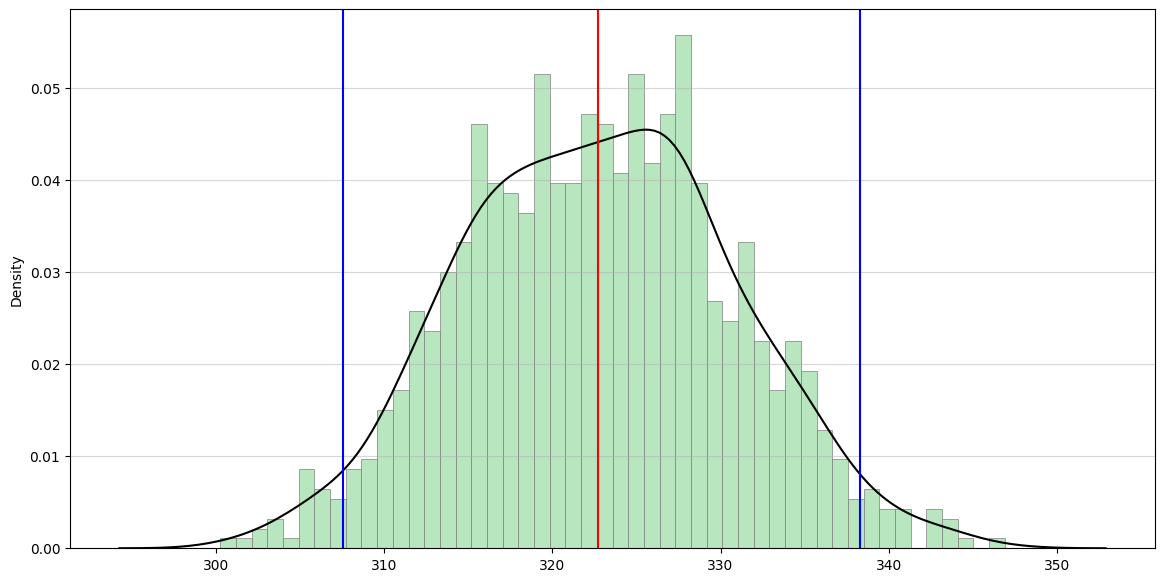

In [ ]:
#Áp dụng thuật toán bootstrap
bootstrap_fun(df['Total'], np.mean,1000, 0.05)

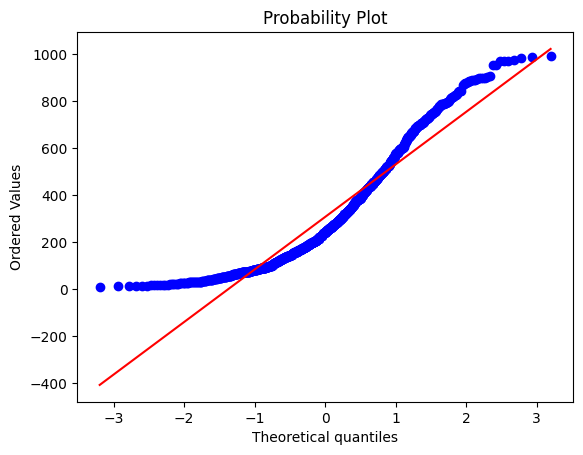

In [ ]:
#Kiểm tra độ lệch của dữ liệu với biểu đồ qq-plot
st.probplot(df['cogs'], dist = 'norm', plot = pylab)
pylab.show()

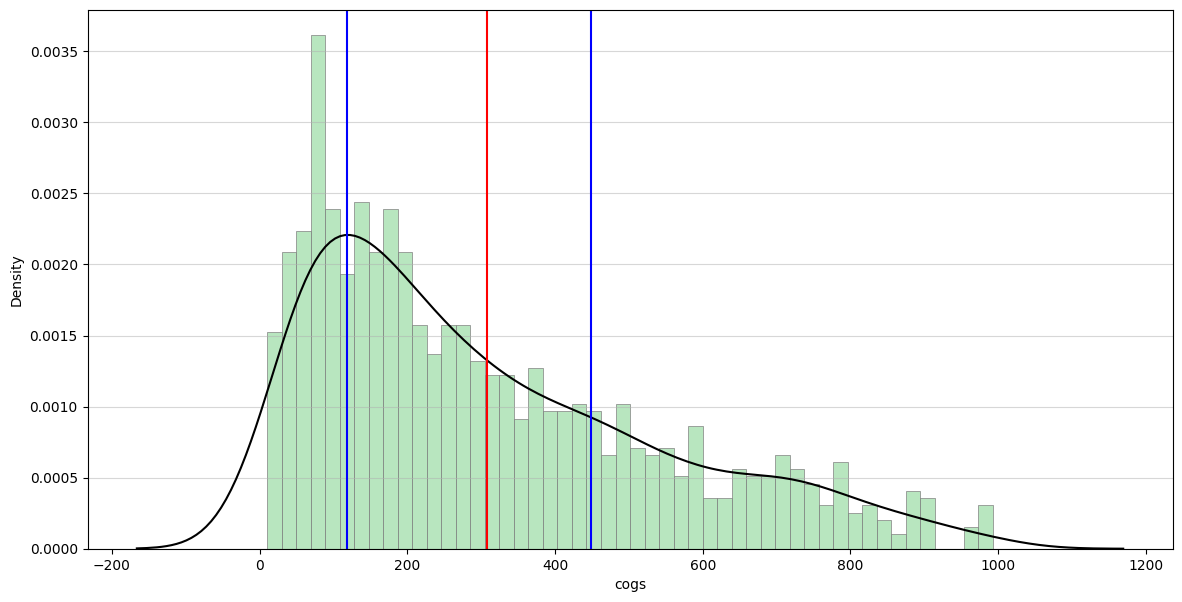

In [ ]:
#Trực quan hóa dữ liệu để thấy độ lệch của dữ
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(df['cogs'], bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
sns.kdeplot(df['cogs'], color = 'black')

ax.grid(axis = 'y', alpha = 0.5)
plt.axvline(df['cogs'].mean(), color = 'red')
plt.axvline(df['cogs'].quantile(0.25), color = 'blue')
plt.axvline(df['cogs'].quantile(0.75), color = 'blue')

plt.show()

Mean mẫu gốc: 307.58738, với độ lệch chuẩn: 234.1765096199732
----
Mean sau khi thực hiện Bootstrap: 307.59521537, với độ lệch chuẩn: 7.419996134774199
----
Sai số: 0.007835370000009334
----
Khoảng tin cậy 95%:
 [292.842 .. 307.710 .. 322.767]


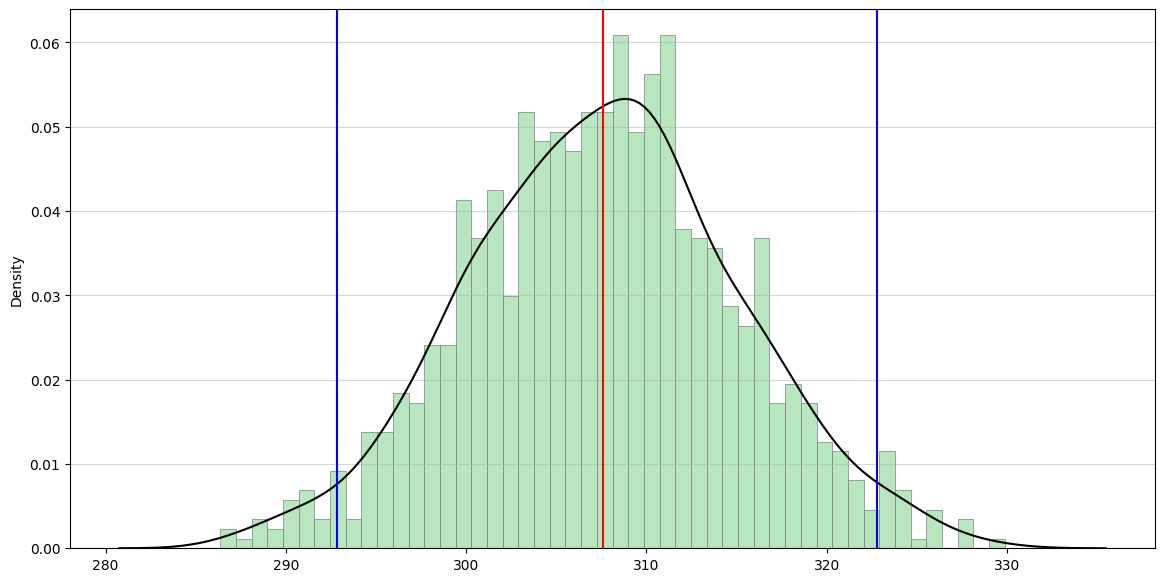

In [ ]:
#Áp dụng thuật toán bootstrap
bootstrap_fun(df['cogs'], np.mean,1000, 0.05)

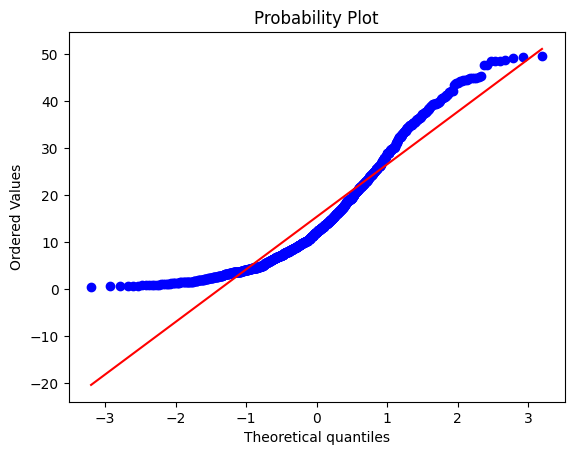

In [ ]:
#Kiểm tra độ lệch của dữ liệu với biểu đồ qq-plot
st.probplot(df['gross income'], dist = 'norm', plot = pylab)
pylab.show()

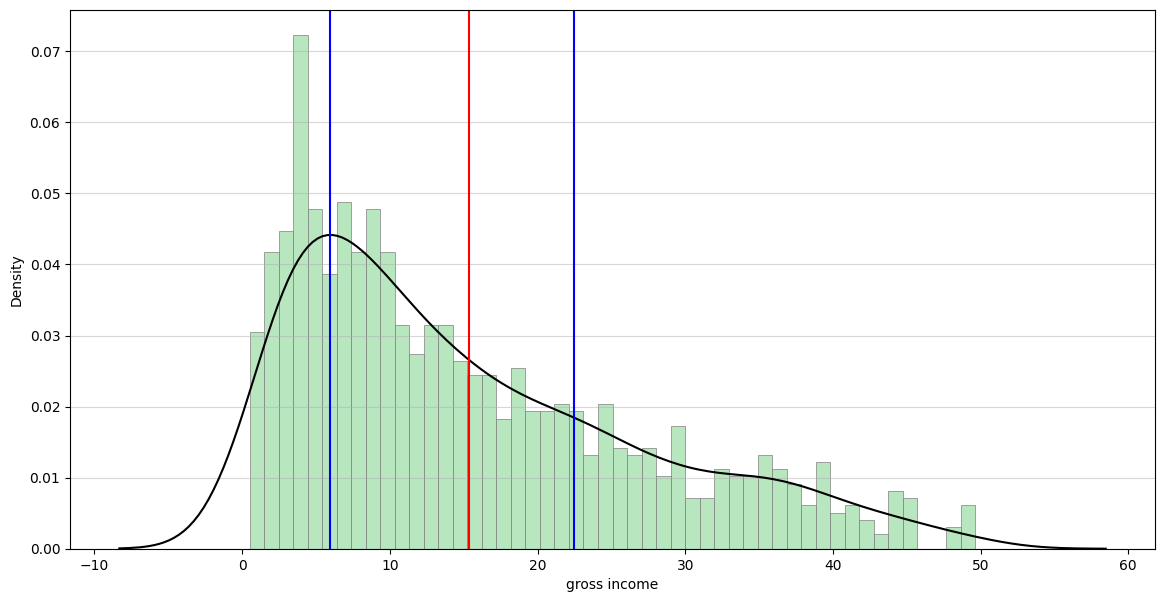

In [ ]:
#Trực quan hóa dữ liệu để thấy độ lệch của dữ
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(df['gross income'], bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
sns.kdeplot(df['gross income'], color = 'black')

ax.grid(axis = 'y', alpha = 0.5)
plt.axvline(df['gross income'].mean(), color = 'red')
plt.axvline(df['gross income'].quantile(0.25), color = 'blue')
plt.axvline(df['gross income'].quantile(0.75), color = 'blue')

plt.show()

Mean mẫu gốc: 15.379368999999999, với độ lệch chuẩn: 11.708825480998659
----
Mean sau khi thực hiện Bootstrap: 15.365917796500002, với độ lệch chuẩn: 0.3658419485264324
----
Sai số: -0.013451203499997177
----
Khoảng tin cậy 95%:
 [14.645 .. 15.366 .. 16.089]


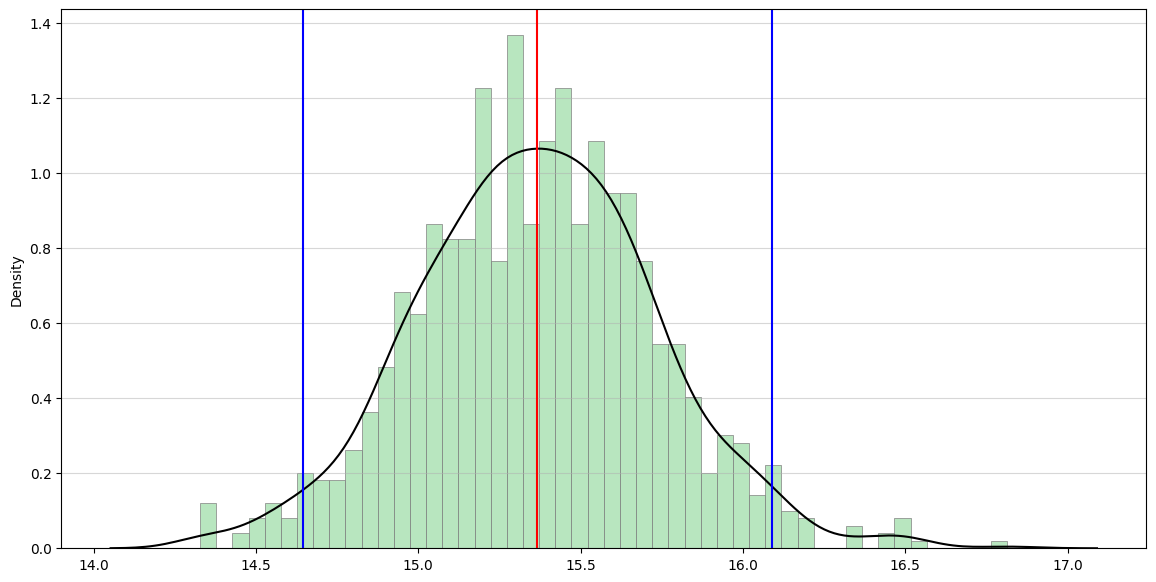

In [ ]:
#Áp dụng thuật toán bootstrap
bootstrap_fun(df['gross income'], np.mean,1000, 0.05)

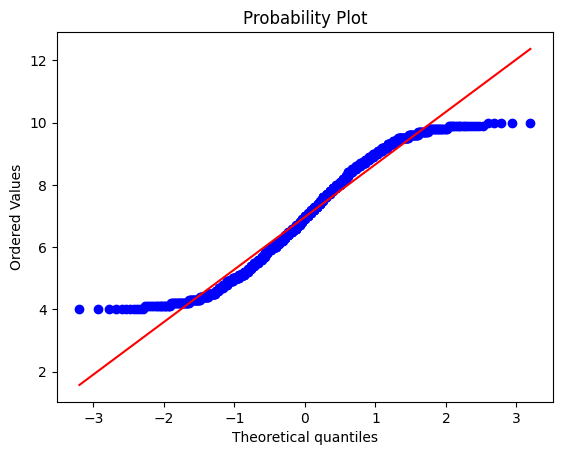

In [ ]:
#Kiểm tra độ lệch của dữ liệu với biểu đồ qq-plot
st.probplot(df['Rating'], dist = 'norm', plot = pylab)
pylab.show()

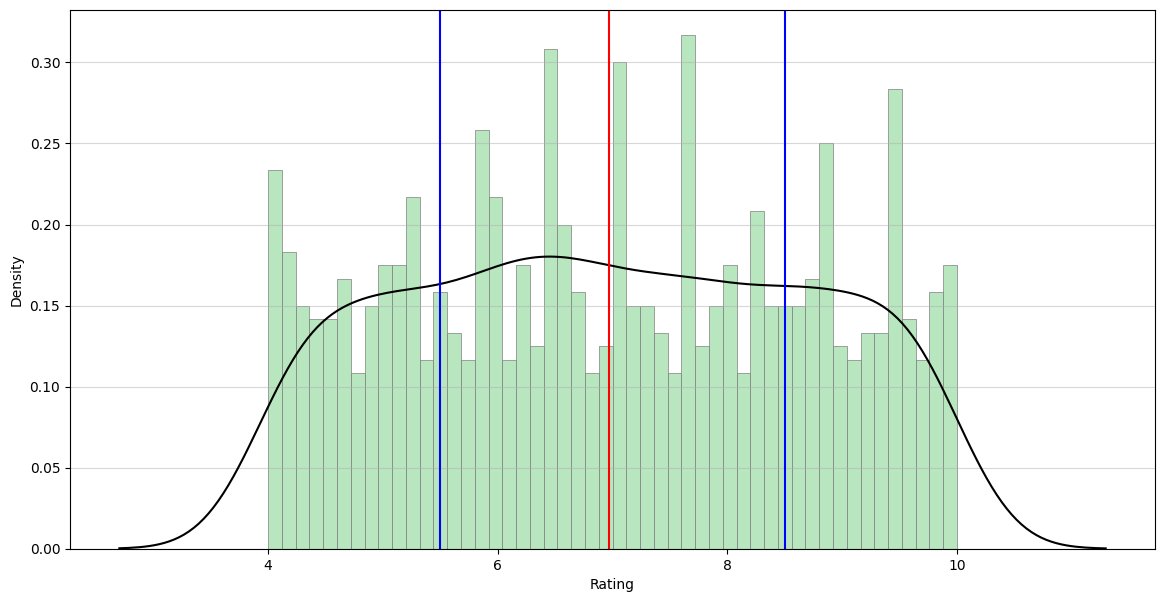

In [ ]:
#Trực quan hóa dữ liệu để thấy độ lệch của dữ
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(df['Rating'], bins =50, color = '#a0deaa', linewidth = 0.5, edgecolor = 'gray', stat = 'density')
sns.kdeplot(df['Rating'], color = 'black')

ax.grid(axis = 'y', alpha = 0.5)
plt.axvline(df['Rating'].mean(), color = 'red')
plt.axvline(df['Rating'].quantile(0.25), color = 'blue')
plt.axvline(df['Rating'].quantile(0.75), color = 'blue')

plt.show()

Mean mẫu gốc: 6.9727, với độ lệch chuẩn: 1.7185802943791215
----
Mean sau khi thực hiện Bootstrap: 6.9738918000000005, với độ lệch chuẩn: 0.05381557816060326
----
Sai số: 0.0011918000000008533
----
Khoảng tin cậy 95%:
 [6.874 .. 6.974 .. 7.077]


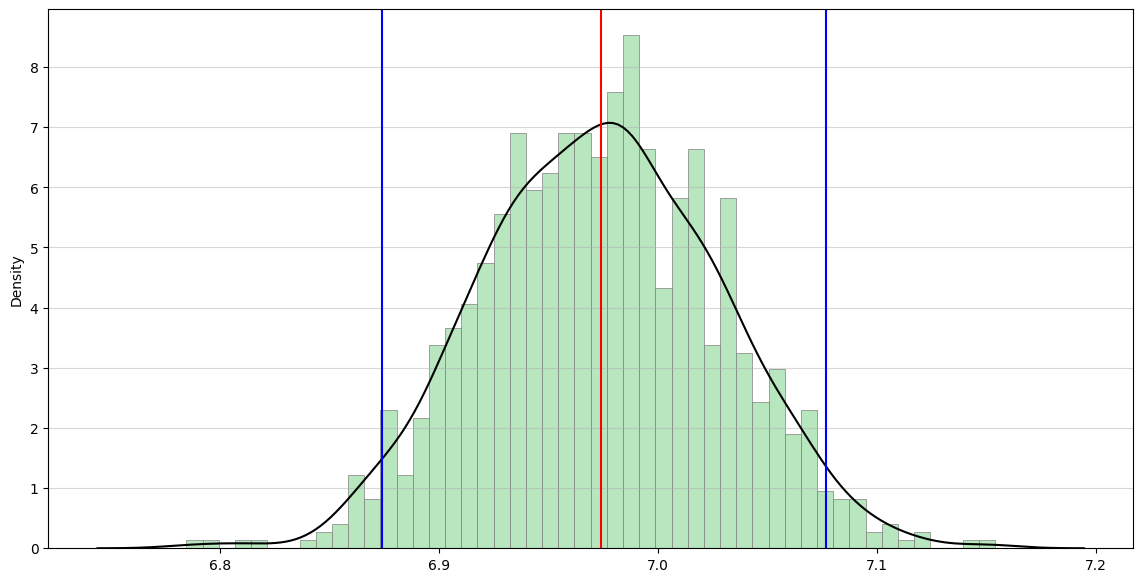

In [ ]:
#Áp dụng thuật toán bootstrap
bootstrap_fun(df['Rating'], np.mean, 1000, 0.05)

Kiểm tra outliers

Text(0.5, 1.0, 'BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT')

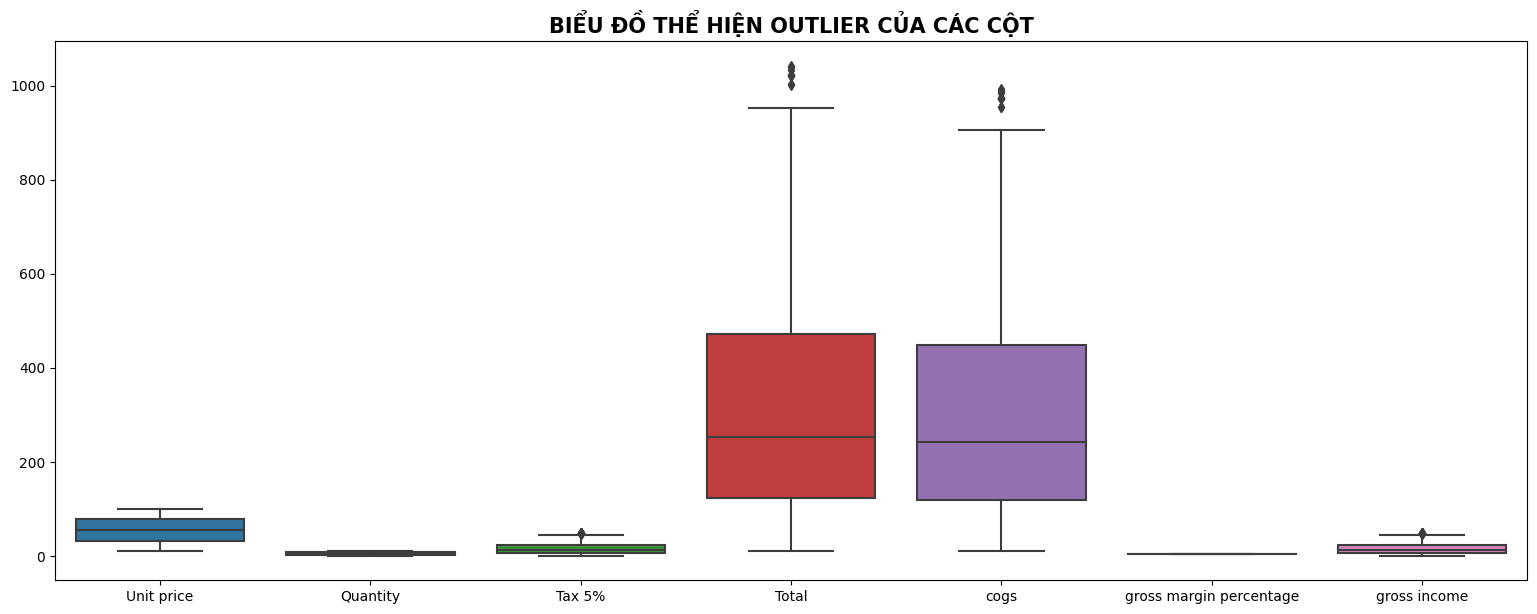

In [ ]:
%matplotlib inline
plt.subplots(figsize = (19,7))
sns.boxplot(data = numerical_features)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT', fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT SAU KHI ÁP DỤNG MIXMAXSCALER')

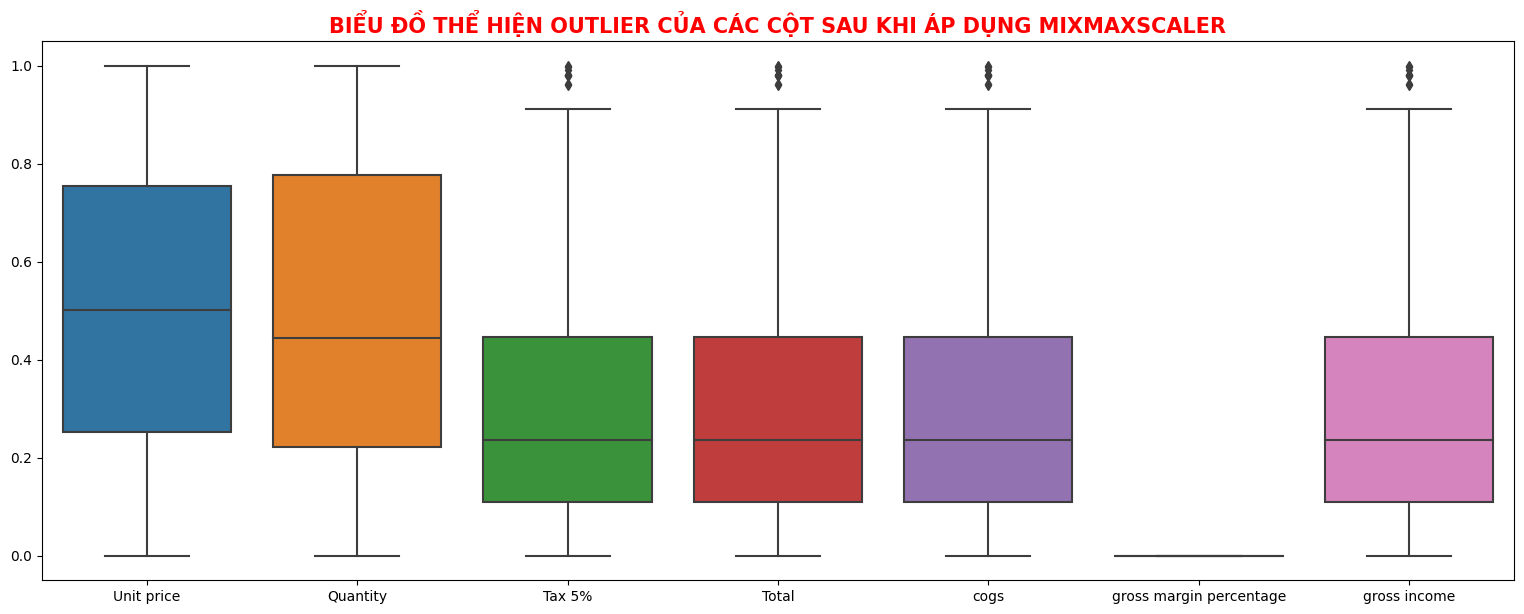

In [ ]:
# Chuẩn hóa dữ liệu bằng MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sa = scaler.fit_transform(numerical_features)
sd = pd.DataFrame(sa, columns = numerical_features.columns)
plt. subplots(figsize = (19,7))
sns.boxplot(data = sd)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT SAU KHI ÁP DỤNG MIXMAXSCALER', fontsize = 15, color = 'red', fontweight = 'bold')

In [ ]:
# Tính giới hạn trên
columns = numerical_features.columns
q1_list = []
q3_list = []
median_list = []
for c in columns:
  c1 = df[c].quantile(.25)
  c2 = df[c].quantile(.5)
  c3 = df[c].quantile(.75)
  q1_list.append(c1)
  q3_list.append(c3)
  median_list.append(c2)

In [ ]:
upper_bound = [(x + (x - y) * 1.5) for x, y in zip(q3_list, q1_list)]
upper_bound

[145.525,
 15.5,
 47.2258125,
 991.7420625,
 944.5162500000001,
 4.761904762,
 47.2258125]

In [ ]:
# Kiểm tra và thay thế giá trị
i = 0
for c in columns:
  df[c] = np.where(df[c] > upper_bound[i], median_list[i], df[c])
  i += 1

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.049521,316.039941,300.990420,4.761905,15.049521,6.97270
std,26.494628,2.923431,11.271937,236.710686,225.438749,0.000000,11.271937,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.084000,253.764000,241.680000,4.761905,12.084000,7.00000
75%,77.935000,8.000000,22.041000,462.861000,440.820000,4.761905,22.041000,8.50000
max,99.960000,10.000000,45.325000,951.825000,906.500000,4.761905,45.325000,10.00000


**PHÂN TÍCH VÀ BIỂU DIỄN DỮ LIỆU**

HIỆU SUẤT CHI NHÁNH

1. Siêu thị có bao nhiêu chi nhánh của hàng và mỗi chi nhánh có số lượng bao nhiêu?

In [ ]:
branch_counts = df['Branch'].value_counts()
branch_counts

A    340
B    332
C    328
Name: Branch, dtype: int64

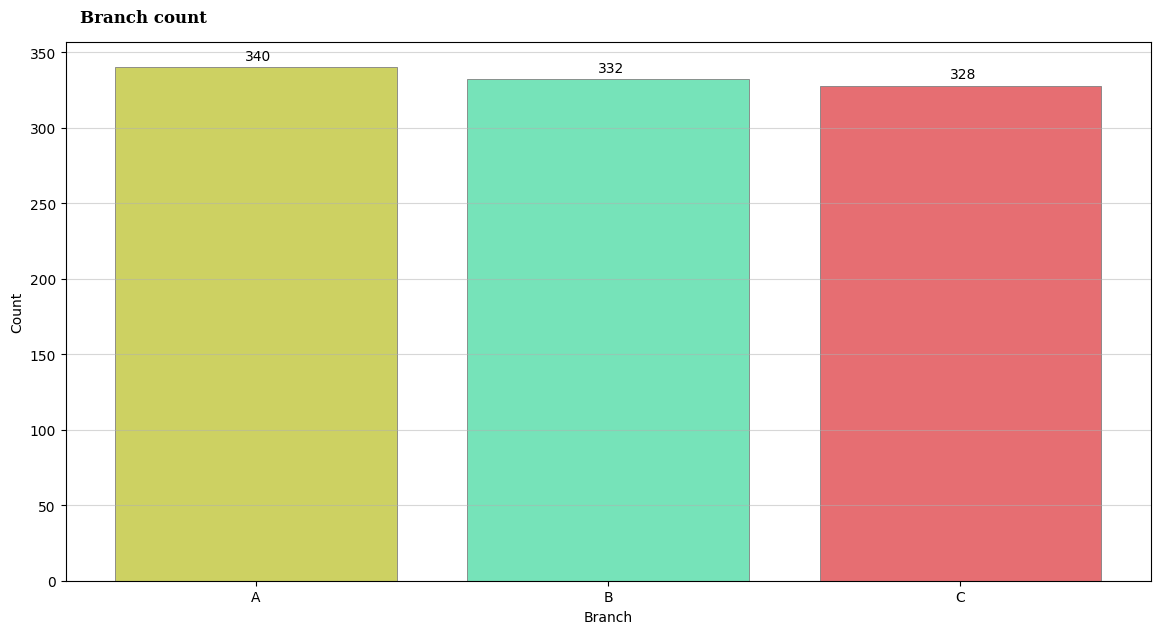

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(branch_counts.index, branch_counts, color = ['#cdd162', '#76e3b9', '#e66e72'], edgecolor='gray', linewidth=0.6)
ax.grid(axis='y', alpha = 0.5)

for i,v in enumerate(branch_counts):
    ax.text(i-0.03,v+5,str(v))

plt.xlabel('Branch')
plt.ylabel('Count')

plt.text(-0.5,370, 'Branch count', fontfamily='serif', fontweight='bold', fontsize=12)

plt.show()

2. Các chi nhánh tập trung ở những thành phố nào?

In [ ]:
city_counts = df["City"].value_counts()
city_counts

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

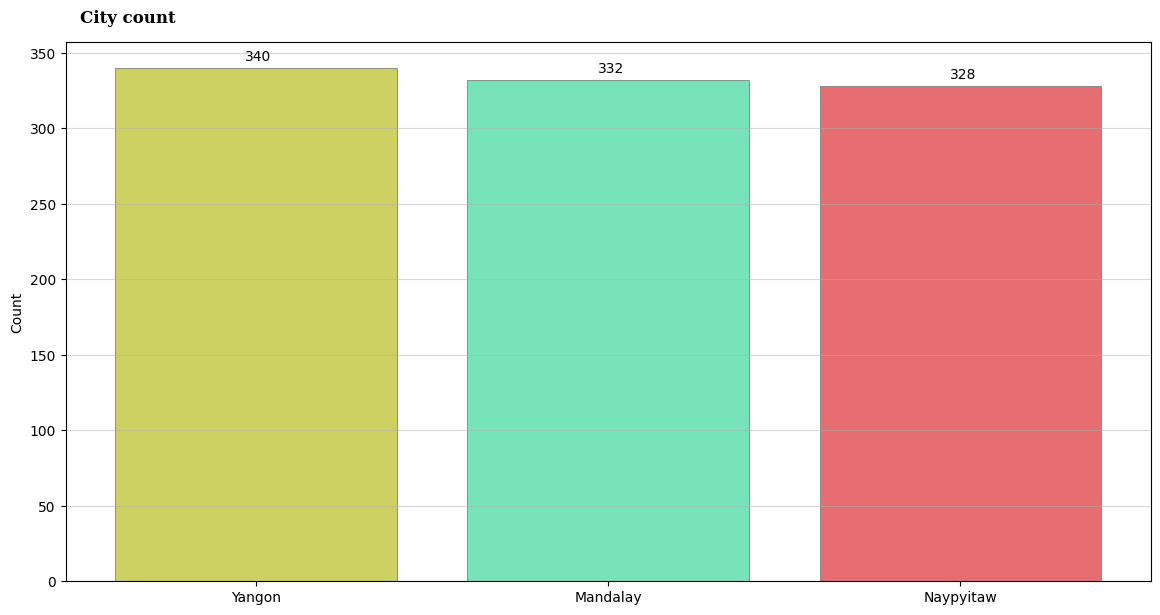

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(city_counts.index, city_counts, edgecolor='gray', linewidth=0.6, color = ['#cdd162', '#76e3b9', '#e66e72'])
ax.grid(axis = 'y', alpha = 0.5)

for i,v in enumerate(city_counts):
    ax.text(i-0.03,v+5, str(v))


plt.ylabel('Count')

plt.text(-0.5,370, 'City count', fontfamily='serif', fontweight='bold', fontsize=12)

plt.show()


3. Số lượng bán hàng theo Chi nhánh trong mỗi thành phố?

In [ ]:
city_branch_counts = df.groupby('City')['Branch'].value_counts()
city_branch_counts

City       Branch
Mandalay   B         332
Naypyitaw  C         328
Yangon     A         340
Name: Branch, dtype: int64

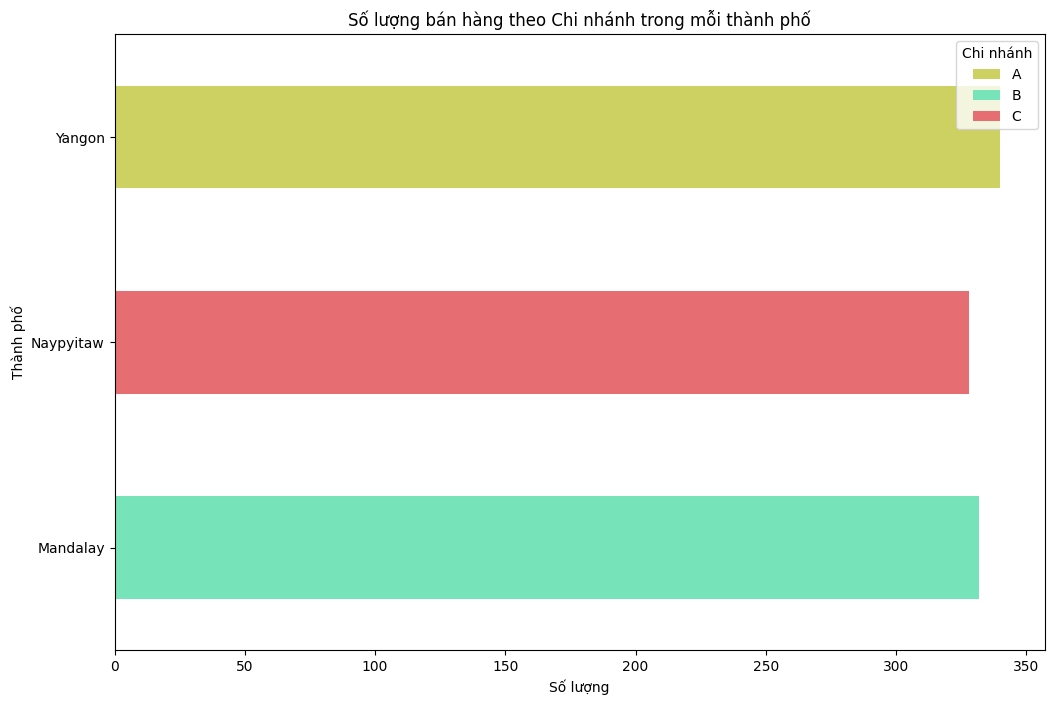

In [ ]:
city_branch_counts.unstack().plot(kind='barh', stacked=True, color = ['#cdd162', '#76e3b9', '#e66e72'], figsize=(12, 8))
plt.title('Số lượng bán hàng theo Chi nhánh trong mỗi thành phố')
plt.xlabel('Số lượng')
plt.ylabel('Thành phố')
plt.legend(title='Chi nhánh', loc='upper right')
plt.show()

4. Thành phố có thu nhập gộp cao nhất

In [ ]:
city_gross_income = df.groupby('City')['gross income'].sum()

most_profitable_city = city_gross_income.idxmax()
total_income_most_profitable_city = city_gross_income.max()

print(f"Thành phố có thu nhập gộp cao nhất là {most_profitable_city} với tổng thu nhập gộp là {total_income_most_profitable_city}")

Thành phố có thu nhập gộp cao nhất là Naypyitaw với tổng thu nhập gộp là 5045.9295


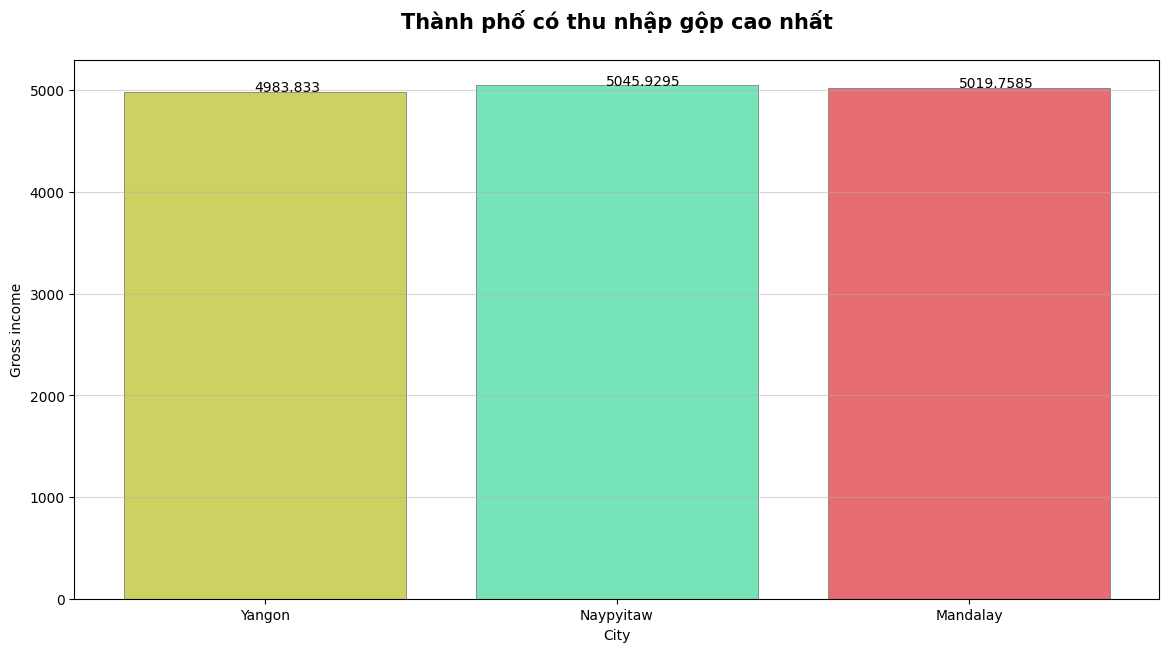

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#cdd162', '#76e3b9', '#e66e72']
ax.bar(df['City'].unique(), df.groupby('City')['gross income'].sum(), color=colors, edgecolor='gray', linewidth=0.6)

ax.grid(axis='y', alpha=0.5)

for i, v in enumerate(df.groupby('City')['gross income'].sum()):
    ax.text(i - 0.03, v + 5, str(v))

ax.set_xlabel('City')
ax.set_ylabel('Gross income')

plt.title('Thành phố có thu nhập gộp cao nhất\n', fontsize=15, fontweight='bold')

plt.show()

5. Tổng doanh thu bán hàng theo Chi nhánh trong mỗi thành phố

In [ ]:
city_branch_totals = df.groupby(['City', 'Branch'])['Total'].sum()
city_branch_totals

City       Branch
Mandalay   B         104660.4930
Naypyitaw  C         105964.5195
Yangon     A         105414.9285
Name: Total, dtype: float64

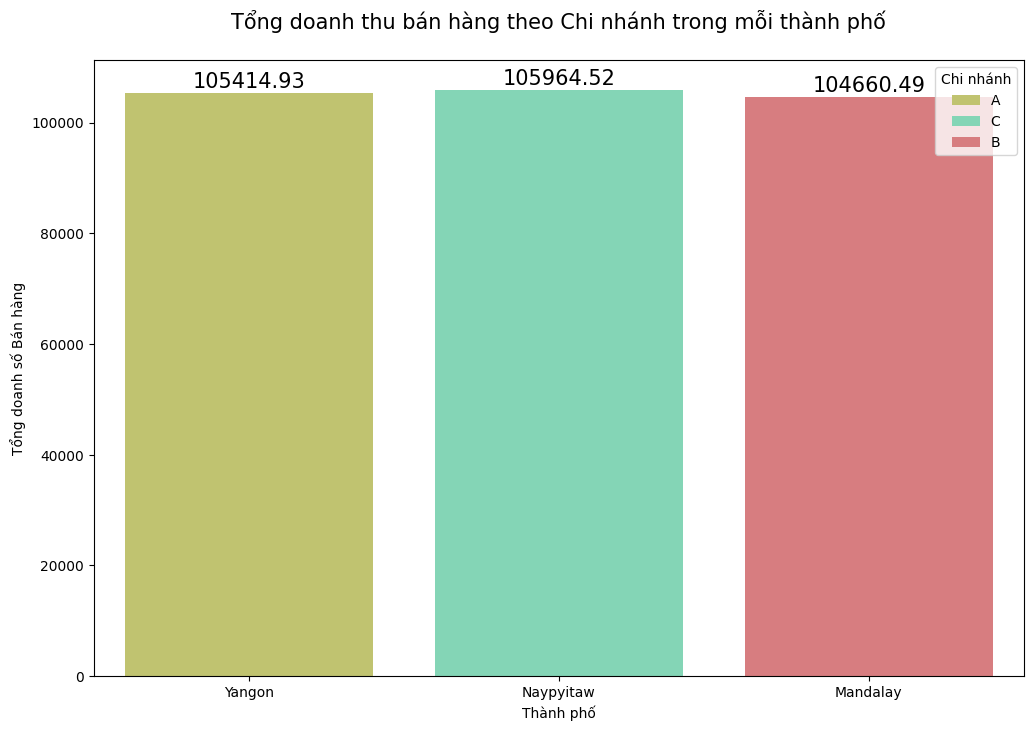

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='City', y='Total', hue='Branch', data=df, estimator=sum, ci=None, dodge=False,
                 palette=['#cdd162', '#76e3b9', '#e66e72', '#cdd162', '#76e3b9', '#e66e72', '#cdd162', '#76e3b9', '#e66e72'])
plt.title('Tổng doanh thu bán hàng theo Chi nhánh trong mỗi thành phố\n', size=15)
plt.xlabel('Thành phố')
plt.ylabel('Tổng doanh số Bán hàng')
plt.legend(title='Chi nhánh', loc='upper right')

for bar in ax.patches:
    if bar.get_height() != 0:
        ax.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.show()

**TỆP KHÁCH HÀNG CỦA SIÊU THỊ**

1. Loại khách hàng của siêu thị?

In [ ]:
cus_counts = df['Customer type'].value_counts()
cus_counts

Member    501
Normal    499
Name: Customer type, dtype: int64

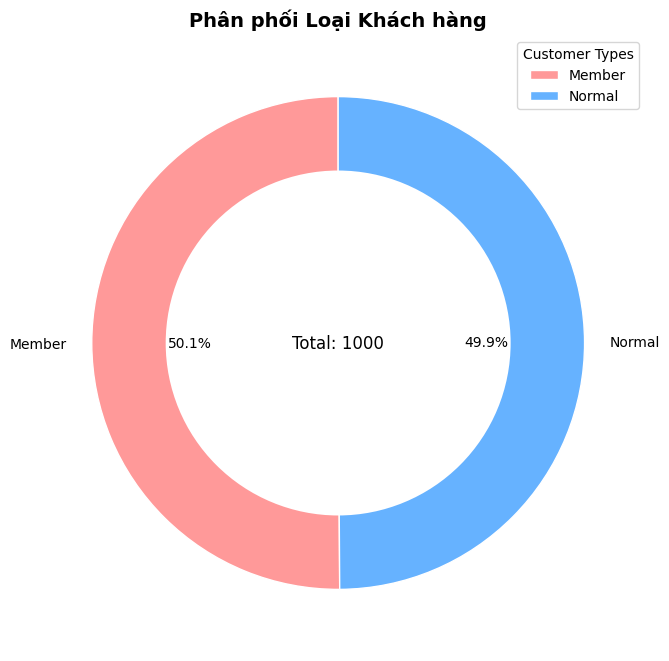

In [ ]:
pastel_colors = ['#FF9999', '#66B2FF']

plt.figure(figsize=(8, 8))
plt.pie(cus_counts, labels=cus_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

plt.text(0, 0, f'Total: {cus_counts.sum()}', ha='center', va='center', fontsize=12, color='black')
plt.title('Phân phối Loại Khách hàng', fontsize=14, fontweight='bold')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(title='Customer Types', loc='upper right')
plt.show()

In [ ]:
data1 = df[['Customer type','Total']]
data1.head(5)

,Customer type,Total
0,Member,548.9715
1,Normal,80.2200
2,Normal,340.5255
3,Member,489.0480
4,Normal,634.3785


In [ ]:
##Kiểm định liệu với loại khách hàng khác nhau thì tổng chi tiêu có thay đổi
Member=data1[data1['Customer type']=='Member']['Total']
Normal=data1[data1['Customer type']=='Normal']['Total']
f, p = st.f_oneway(Member, Normal)
print('H0:Không có sự thay đổi giữa các loại khách hàng')
print('Ha:Có sự thay đổi giữa các loại khách hàng')
alpha = 0.05
if (p < alpha):
  print(f'Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0')

else:
  print(f'Trị số p = {p:.4f} >= {alpha:.4f} không nên bác bỏ H0')

H0:Không có sự thay đổi giữa các loại khách hàng
Ha:Có sự thay đổi giữa các loại khách hàng
Trị số p = 0.3430 >= 0.0500 không nên bác bỏ H0


2. Giới tính của khách hàng tập trung vào?

In [ ]:
label=df['Gender'].unique()
values=df['Gender'].value_counts().values
gender_counts = df['Gender'].value_counts()
gender_counts

Female    501
Male      499
Name: Gender, dtype: int64

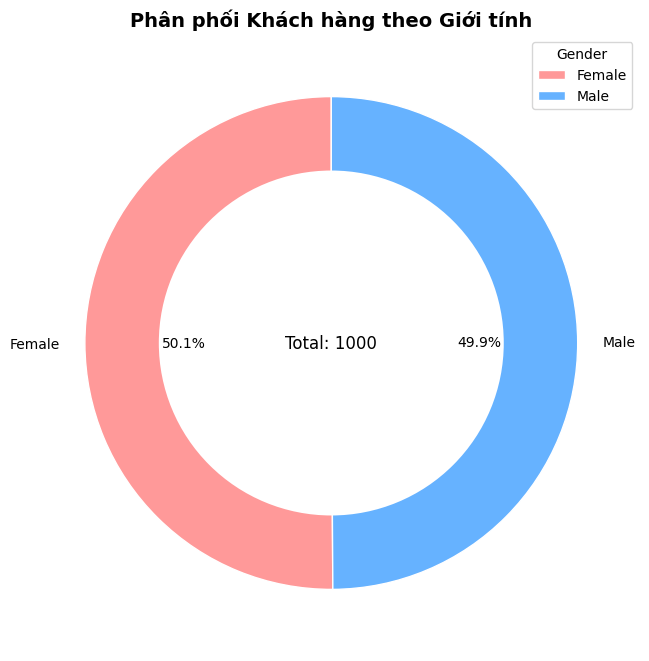

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

plt.text(0, 0, f'Total: {gender_counts.sum()}', ha='center', va='center', fontsize=12, color='black')
plt.title('Phân phối Khách hàng theo Giới tính', fontsize=14, fontweight='bold')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(title='Gender', loc='upper right')
plt.show()

In [ ]:
##Kiểm định liệu với giới  khác nhau thì tổng chi tiêu có thay đổi
data2 = df[['Gender','Total']]
data2.head(5)

,Gender,Total
0,Female,548.9715
1,Female,80.2200
2,Male,340.5255
3,Male,489.0480
4,Male,634.3785


In [ ]:
#Kiểm định liệu với giới khác nhau thì tổng chi tiêu có thay đổi
Male=data2[data2['Gender']=='Male']['Total']
Female=data2[data2['Gender']=='Female']['Total']
f, p = st.f_oneway(Male, Female)
print('H0:Không có sự thay đổi giữa các loại giới tính')
print('Ha:Có sự thay đổi giữa các loại giới tính')
alpha = 0.05
if (p < alpha):
  print(f'Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0')

else:
  print(f'Trị số p = {p:.4f} >= {alpha:.4f} không nên bác bỏ H0')

H0:Không có sự thay đổi giữa các loại giới tính
Ha:Có sự thay đổi giữa các loại giới tính
Trị số p = 0.1883 >= 0.0500 không nên bác bỏ H0


3. Giới tính của từng loại khách hàng?

In [ ]:
gen_cus = df.groupby('Gender')["Customer type"].value_counts()
gen_cus

Gender  Customer type
Female  Member           261
        Normal           240
Male    Normal           259
        Member           240
Name: Customer type, dtype: int64

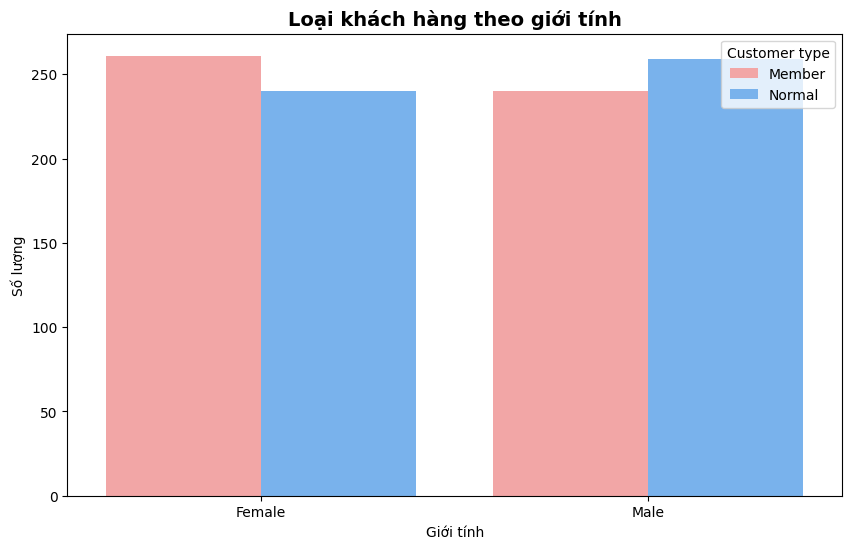

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Customer type', data=df, palette=pastel_colors)
plt.title('Loại khách hàng theo giới tính', fontsize=14, fontweight='bold')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')

plt.show()

**CÁC DÒNG SẢN PHẨM CỦA SIÊU THỊ**

1. Số lượng từng dòng sản phẩm của siêu thị

In [ ]:
product_count = df['Product line'].value_counts().reset_index().set_index('index')
product_count

,Product line
index,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


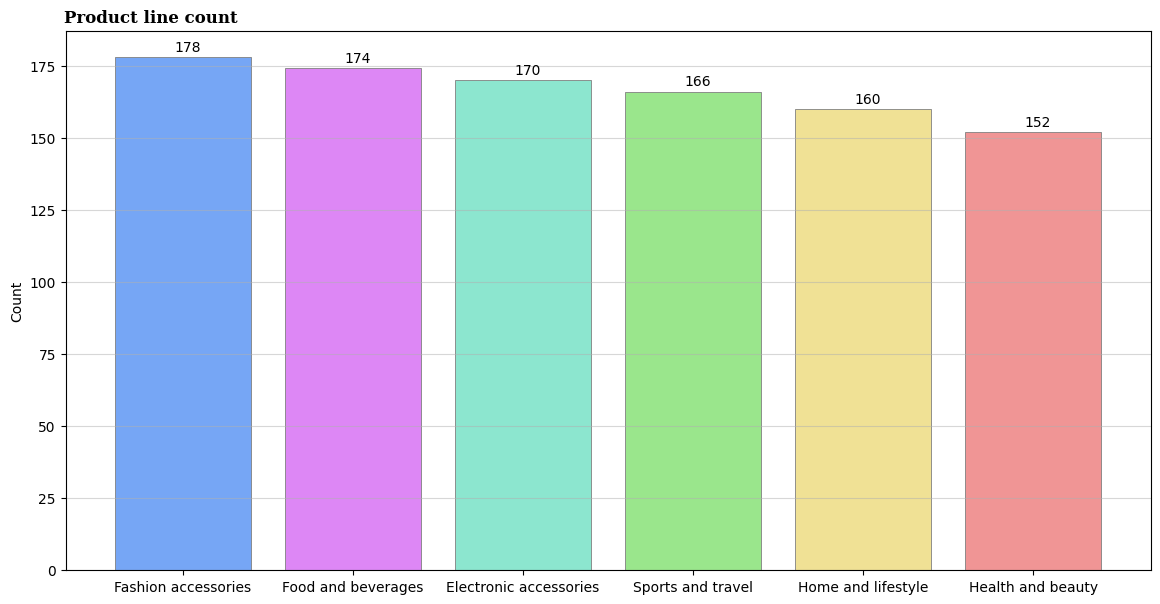

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(product_count.index, product_count['Product line'], linewidth = 0.6, edgecolor = 'grey', color = ['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c','#f0e195', '#f09595', '#fa9548'])

for i, v in enumerate(product_count['Product line']):
    ax.text(i-0.05, v+2, str(v))

ax.grid(axis = 'y', alpha = 0.5)


plt.ylabel('Count')

plt.text(-0.7, 190, 'Product line count', fontsize = 12, fontweight = 'bold', fontfamily= 'serif')
plt.show()

2. Tệp khách hàng mua các dòng sản phẩm?

In [ ]:
product_customer = df[['Customer type', 'Product line']].groupby('Customer type')['Product line'].value_counts().unstack()
product_customer

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,78,86,94,73,83,87
Normal,92,92,80,79,77,79


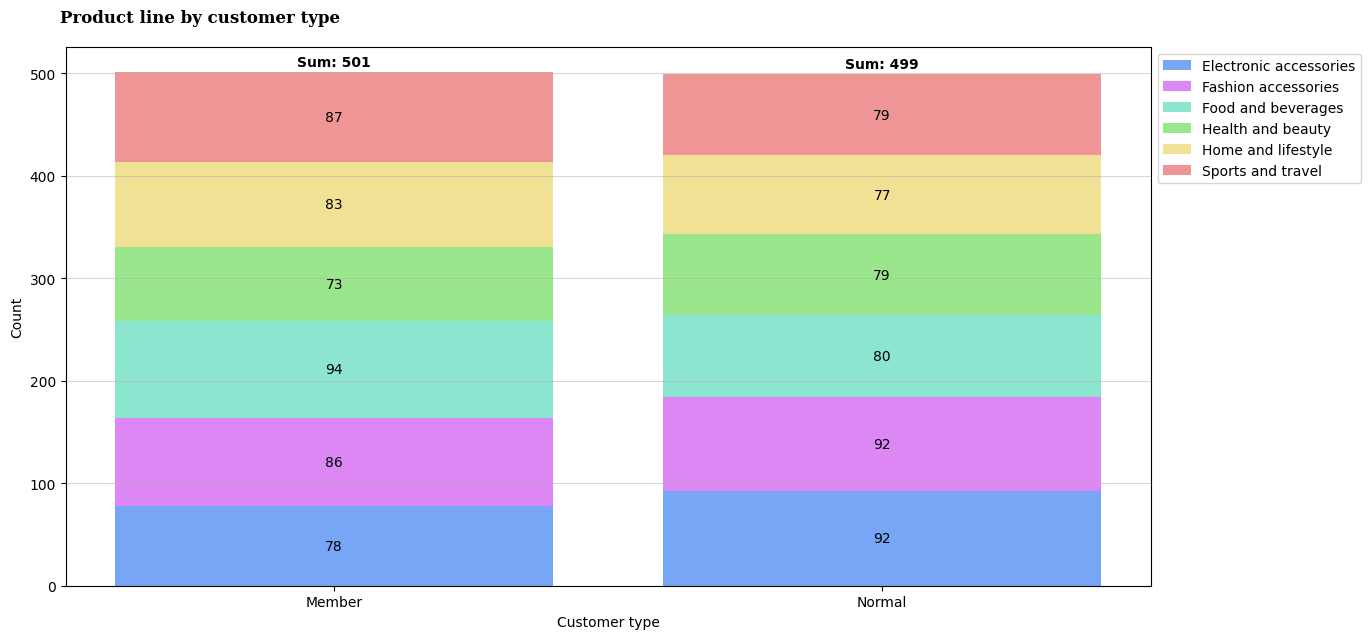

In [ ]:
product_customer['sum'] = product_customer.sum(axis = 1)
color = ['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c','#f0e195', '#f09595', '#fa9548']
bottom = len(product_customer)* [0]

fig, ax = plt.subplots(figsize=(14,7))

for idx, name in enumerate(product_customer.columns[~product_customer.columns.isin(['sum'])]):
    ax.bar(product_customer.index, product_customer[name], bottom = bottom, color = color[idx])
    bottom = bottom + product_customer[name]

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x,y = i.get_xy()
    ax.text(x+width/2, y+height/2, height, horizontalalignment = 'center', verticalalignment = 'center')

for i, v in enumerate(product_customer['sum']):
    ax.text(i, v+10, f"Sum: {v}", fontweight = 'bold', horizontalalignment = 'center', verticalalignment = 'center')


ax.grid(axis = 'y', alpha = 0.5)
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.legend(product_customer.columns[~product_customer.columns.isin(['sum'])], bbox_to_anchor = [1,1,0,0])

plt.text(-0.5,550,'Product line by customer type', fontsize = 12, fontfamily = 'serif', fontweight = 'bold')
plt.show()

3. Sản phẩm ở mỗi chi nhánh như thế nào?

In [ ]:
product_branch = df[['Product line','Branch']].groupby('Branch')['Product line'].value_counts().unstack()
product_branch

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


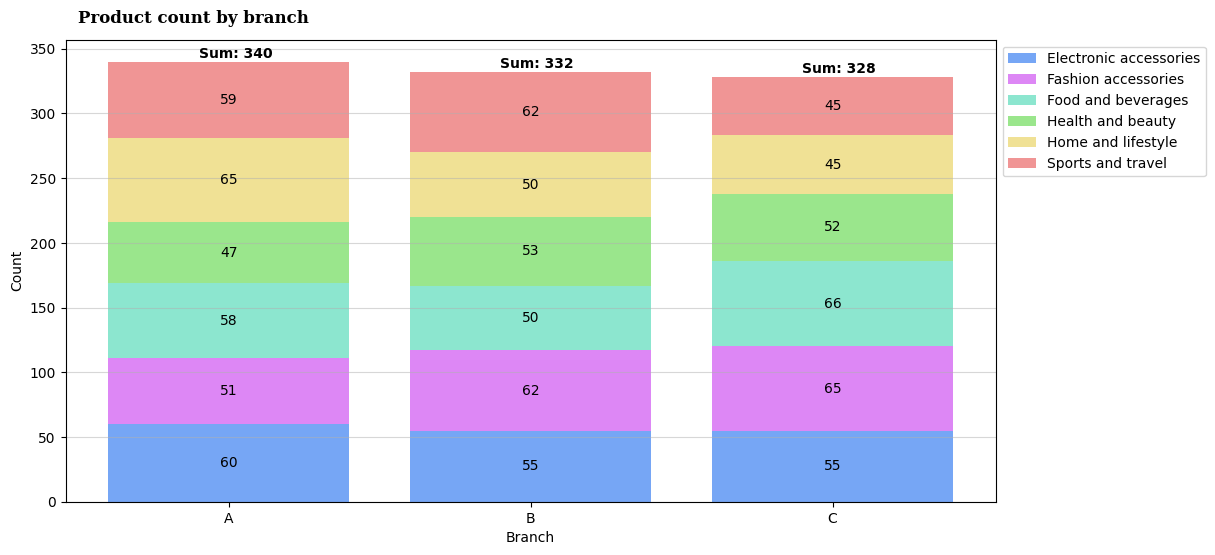

In [ ]:
product_branch['sum'] = product_branch.sum(axis = 1)
colors = ['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c','#f0e195', '#f09595', '#fa9548']

fig, ax = plt.subplots(figsize=(12,6))
bottom = len(product_branch) * [0]

for idx, name in enumerate(product_branch.columns[~product_branch.columns.isin(['sum'])]):
    ax.bar(product_branch.index, product_branch[name], bottom = bottom, color = colors[idx])
    bottom = bottom + product_branch[name]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x+width/2, y+height/2, f"{height}", horizontalalignment = 'center', verticalalignment = 'center')

for i, v in enumerate(product_branch['sum']):
    ax.text(i-0.1,v+3, f"Sum: {v}", weight = 'bold')


ax.grid(axis = 'y', alpha = 0.5)

plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(product_branch.columns[~product_branch.columns.isin(['sum'])], bbox_to_anchor = [1,1,0,0])

plt.text(-0.5, 370, 'Product count by branch', fontfamily = 'serif', fontweight = 'bold', fontsize = 12)
plt.show()

4. Sản phẩm theo giới tính

In [ ]:
product_gender = df[['Product line','Gender']].groupby('Gender')['Product line'].value_counts().unstack()
product_gender

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


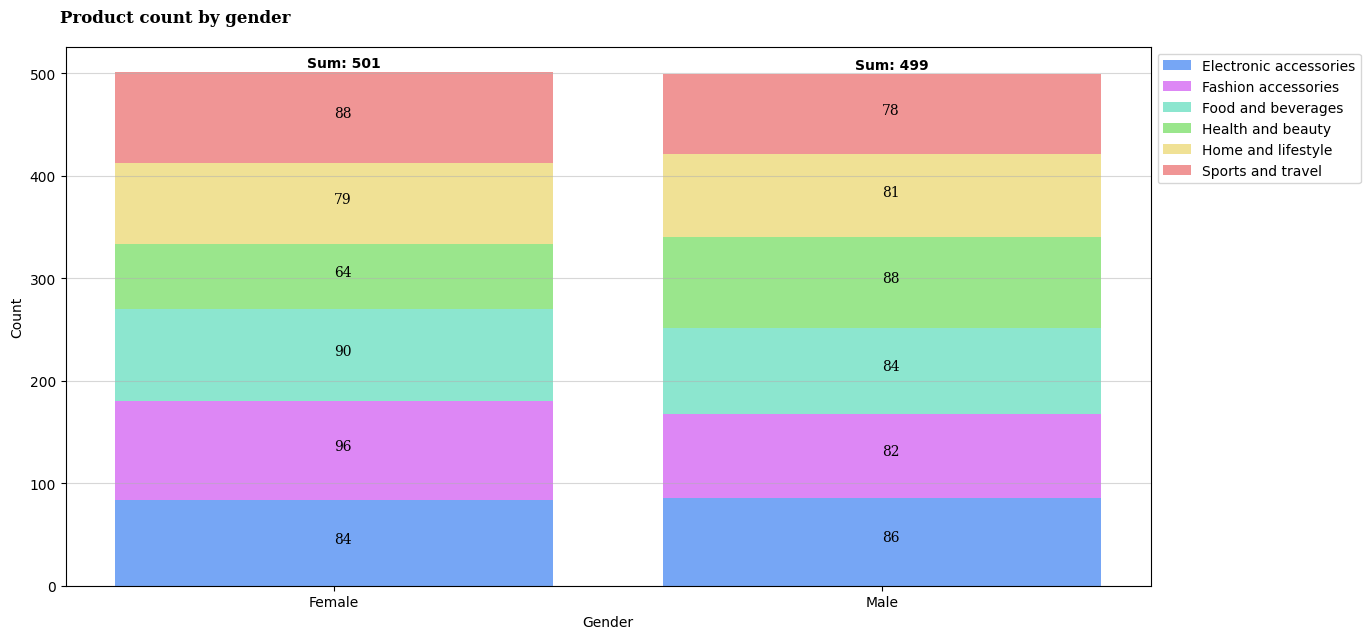

In [ ]:
product_gender['sum'] = product_gender.sum(axis=1)

fig, ax = plt.subplots(figsize=(14,7))
bottom = len(product_gender) * [0]


for idx, name in enumerate(product_gender.columns[~product_gender.columns.isin(['sum'])]):
    ax.bar(product_gender.index, product_gender[name], color = colors[idx], bottom = bottom)
    bottom = bottom+product_gender[name]

for i in ax.patches:

    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.text(x+width/2, y+height/2, f"{height}", fontfamily='serif')

for i, v in enumerate(product_gender['sum']):
    ax.text(i-0.05,v+5, str(f"Sum: {v}"), weight = 'bold')


ax.grid(axis='y', alpha = 0.5)

plt.legend(product_gender.columns[~product_gender.columns.isin(['sum'])], bbox_to_anchor = [1,1,0,0])
plt.xlabel('Gender')
plt.ylabel('Count')

plt.text(-0.5, 550, 'Product count by gender', fontfamily = 'serif', fontweight = 'bold', fontsize = 12)
plt.show()

5. Sản phẩm theo unit price

In [ ]:
figure=px.box(df,x='Product line',color='Product line',y='Unit price',title='Product line with Unit price')
figure.show()

6. Tổng giá trung bình theo giới tính cho mỗi dòng sản phẩm là bao nhiêu?

In [ ]:
df.pivot_table(index='Gender',columns='Product line',values='Total',aggfunc='mean')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,322.643125,300.851469,359.892283,290.015414,360.755677,316.209648
Male,316.691965,281.500646,273.499125,348.099460,275.375204,340.360327


7. 5% thuế theo mỗi dòng sản phẩm

In [ ]:
figure=px.box(df,x='Product line',color='Product line',y='Tax 5%',title='Product line with tax 5%')
figure.show()

8. Doanh thu bán hàng theo từng dòng sản phẩm

Dòng sản phẩm có doanh số bán hàng cao nhất: Food and beverages


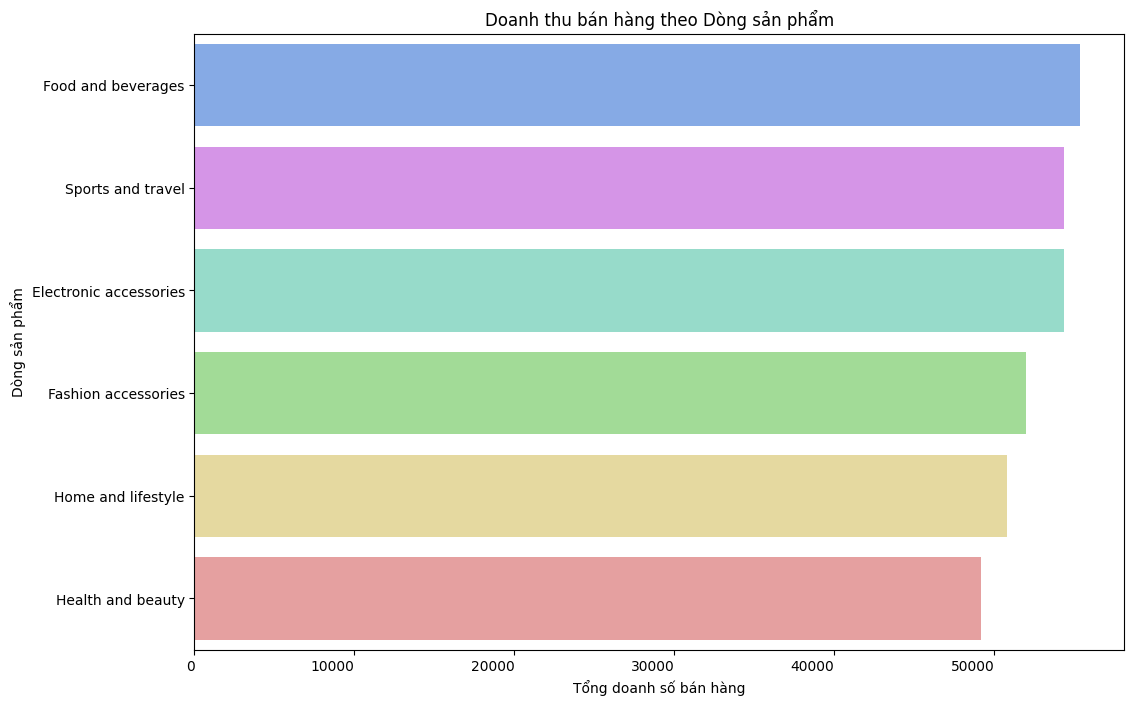

In [ ]:
# Tính toán doanh số bán hàng theo dòng sản phẩm
product_line_total = df.groupby('Product line').sum()['Total'].sort_values(ascending=False)
top_product_line = df.groupby('Product line').sum()['Total'].idxmax()
print(f'Dòng sản phẩm có doanh số bán hàng cao nhất: {top_product_line}')
# Biểu đồ doanh số bán hàng theo dòng sản phẩm với màu sắc tùy chọn
plt.figure(figsize=(12, 8))
sns.barplot(y=product_line_total.index, x=product_line_total, palette=['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c', '#f0e195', '#f09595', '#fa9548'])
plt.title('Doanh thu bán hàng theo Dòng sản phẩm')
plt.xlabel('Tổng doanh số bán hàng')
plt.ylabel('Dòng sản phẩm')
plt.xticks(rotation=0, ha='right')
plt.show()

9. Phân phối xếp loại khách hàng theo từng dòng sản phẩm

In [ ]:
figure = px.box(df, x='Product line', y='Rating', color='Product line', title='Phân phối xếp loại khách hàng theo từng dòng sản phẩm')
figure.show()

**PHƯƠNG THỨC THANH TOÁN**

1. Phương thức thanh toán phổ biến nhất

In [ ]:
payment_count = df['Payment'].value_counts().reset_index().set_index('index')
payment_count

,Payment
index,
Ewallet,345
Cash,344
Credit card,311


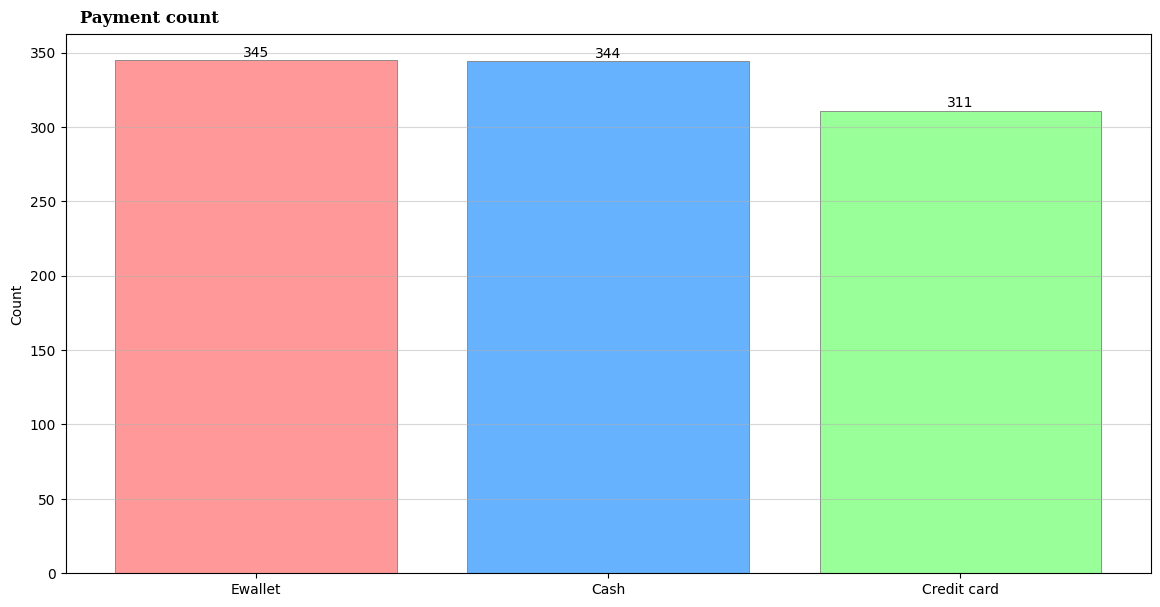

Phương thức thanh toán phổ biến nhất: Ewallet


In [ ]:
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(payment_count.index, payment_count['Payment'], color = ['#FF9999', '#66B2FF', '#99FF99'], linewidth = 0.6, edgecolor = 'gray')

for i,v in enumerate(payment_count['Payment']):
    ax.text(i,v+5, str(v), horizontalalignment = 'center', verticalalignment = 'center')

ax.grid(axis = 'y', alpha = 0.5)

plt.ylabel('Count')
plt.text(-0.5, 370, 'Payment count', fontsize = 12, fontweight='bold',fontfamily='serif')

plt.show()

popular_payment_method = df['Payment'].mode().iloc[0]
print(f'Phương thức thanh toán phổ biến nhất: {popular_payment_method}')

2. Hình thức thanh toán ở mỗi cho nhánh

In [ ]:
payment_counts = df.groupby(['Branch', 'Payment']).size().reset_index(name='Count')
print(payment_counts)

  Branch      Payment  Count
0      A         Cash    110
1      A  Credit card    104
2      A      Ewallet    126
3      B         Cash    110
4      B  Credit card    109
5      B      Ewallet    113
6      C         Cash    124
7      C  Credit card     98
8      C      Ewallet    106


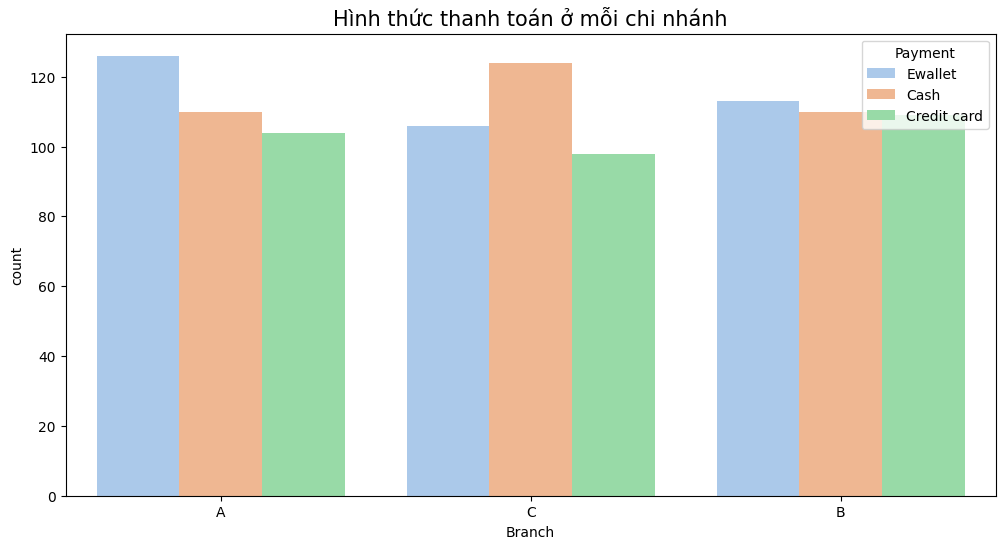

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Branch", hue = "Payment", data = df, palette= "pastel").set_title(label = "Hình thức thanh toán ở mỗi chi nhánh", fontsize= 15);

3.  Hình thức thanh toán của khách hàng theo giới tính

In [ ]:
payment_gender_percent = (df.groupby(['Payment', 'Gender']).size() / len(df) * 100).reset_index(name='Percent')
print(payment_gender_percent)

       Payment  Gender  Percent
0         Cash  Female     17.8
1         Cash    Male     16.6
2  Credit card  Female     16.3
3  Credit card    Male     14.8
4      Ewallet  Female     16.0
5      Ewallet    Male     18.5


In [ ]:
gender_payment=df[['Payment','Gender']].value_counts().to_dict()
df_genderpayment=pd.DataFrame(list(gender_payment.items()),columns=['Payment','Gender'])
df_genderpayment
gender_paymentfig=px.pie(df_genderpayment,values='Gender',names='Payment',title='Hình thức thanh toán của khách hàng theo giới tính',labels='Payment')
gender_paymentfig.update_traces(textposition='inside',textinfo='percent+label')
gender_paymentfig.update_layout(title_x=0.5)
gender_paymentfig.show()

**XU HƯỚNG MUA SẮM CỦA KHÁCH HÀNG THEO THỜI GIAN**

1. Chuyển đổi

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

In [ ]:
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

In [ ]:
df.loc[(df['month'] ==1), 'month'] = 'January'
df.loc[(df['month'] ==2), 'month'] = 'February'
df.loc[(df['month'] ==3), 'month'] = 'March'

In [ ]:
df['Hour'] = df['Time'].dt.hour

time = []
for i in df['Hour']:
    if i>9 and i < 13 :
        time.append('Morning')
    elif i> 12 and i < 18:
        time.append('Afternoon')
    else:
        time.append('Evening')
df['Part_Of_The_Day'] = time

In [ ]:
df = df.drop([ 'Hour' , 'Time'] ,axis =1)

2. Số lượng bán hàng trong tháng

In [ ]:
df.month.value_counts()

January     352
March       345
February    303
Name: month, dtype: int64

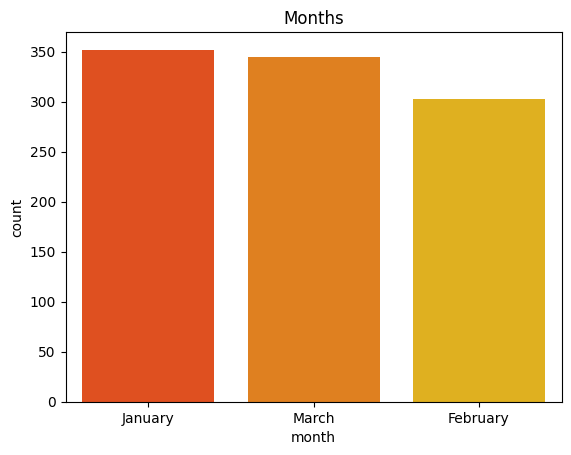

In [ ]:
sns.countplot(x="month", data =df,palette="autumn").set_title("Months")
plt.show()

3. Tổng doanh thu bán hàng của mỗi chi nhánh qua từng tháng

In [ ]:
monthly_sales_by_branch = df.groupby(['month', 'Branch'])['Total'].sum().reset_index()
monthly_sales_by_branch

,month,Branch,Total
0,February,A,29074.6785
1,February,B,34424.2710
2,February,C,31379.3235
3,January,A,38681.1285
4,January,B,36407.5215
5,January,C,37386.1530
6,March,A,37659.1215
7,March,B,33828.7005
8,March,C,37199.0430


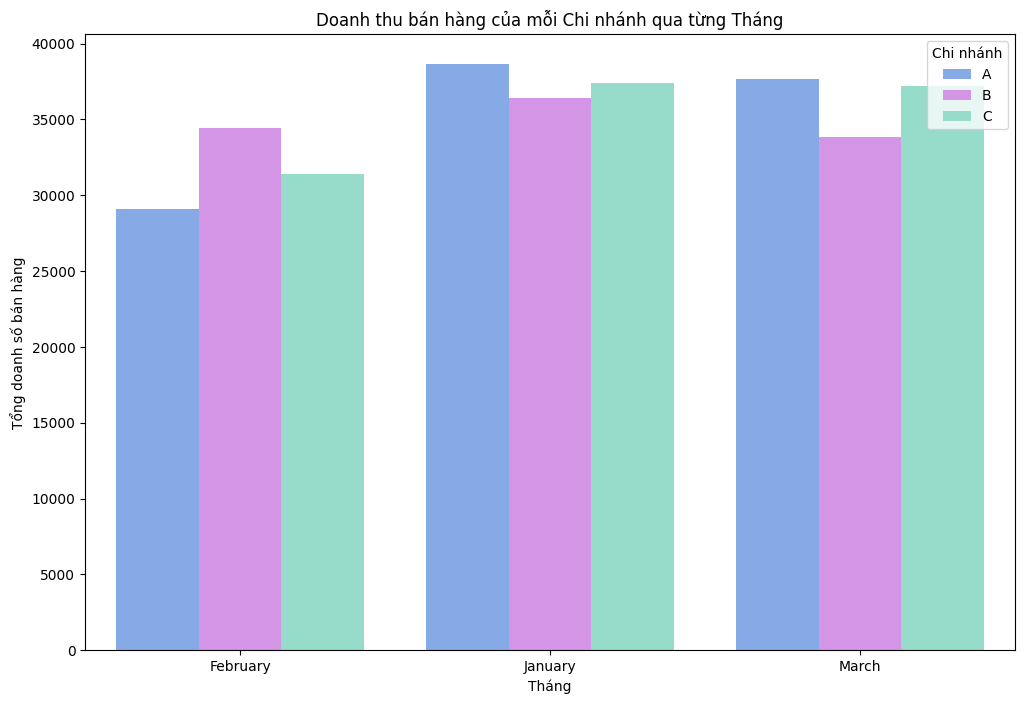

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='Total', hue='Branch', data=monthly_sales_by_branch, palette=['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c', '#f0e195', '#f09595', '#fa9548'])
plt.title('Doanh thu bán hàng của mỗi Chi nhánh qua từng Tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh số bán hàng')
plt.xticks(rotation=0)
plt.legend(title='Chi nhánh', loc='upper right')
plt.show()

4. Tổng doanh số bán hàng cho mỗi ngày trong tuần

In [ ]:
df['Day_of_Week'] = df['Date'].dt.day_name()

# Tính tổng doanh số bán hàng cho mỗi ngày trong tuần
daily_sales = df.groupby('Day_of_Week')['Total'].sum()
daily_sales

Day_of_Week
Friday       41585.2395
Monday       37899.0780
Saturday     54582.2655
Sunday       44457.8925
Thursday     45349.2480
Tuesday      50713.7085
Wednesday    41452.5090
Name: Total, dtype: float64

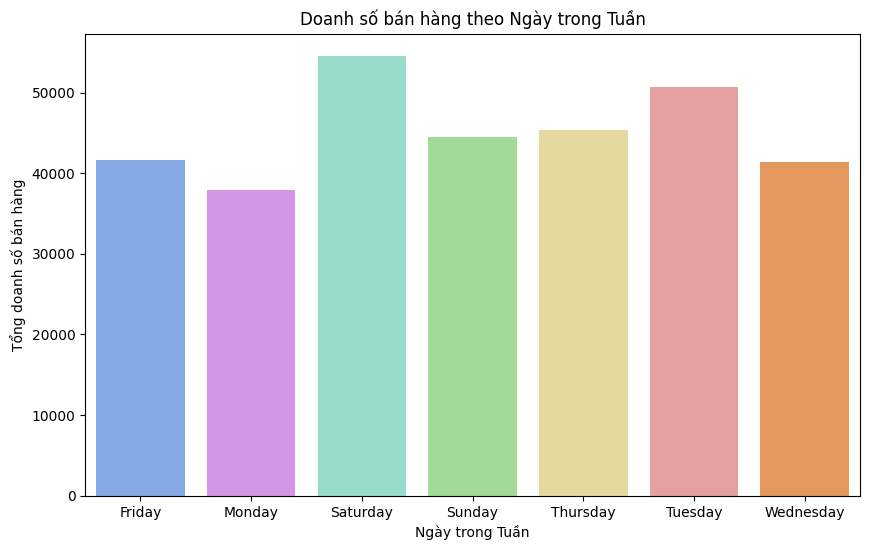

In [ ]:
df['Day_of_Week'] = df['Date'].dt.day_name()

# Tính tổng doanh số bán hàng cho mỗi ngày trong tuần
daily_sales = df.groupby('Day_of_Week')['Total'].sum()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_sales.index, y=daily_sales, palette=['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c', '#f0e195', '#f09595', '#fa9548'])
plt.title('Doanh số bán hàng theo Ngày trong Tuần')
plt.xlabel('Ngày trong Tuần')
plt.ylabel('Tổng doanh số bán hàng')
plt.xticks(rotation=0)
plt.show()

5. Tổng doanh số bán hàng theo ngày

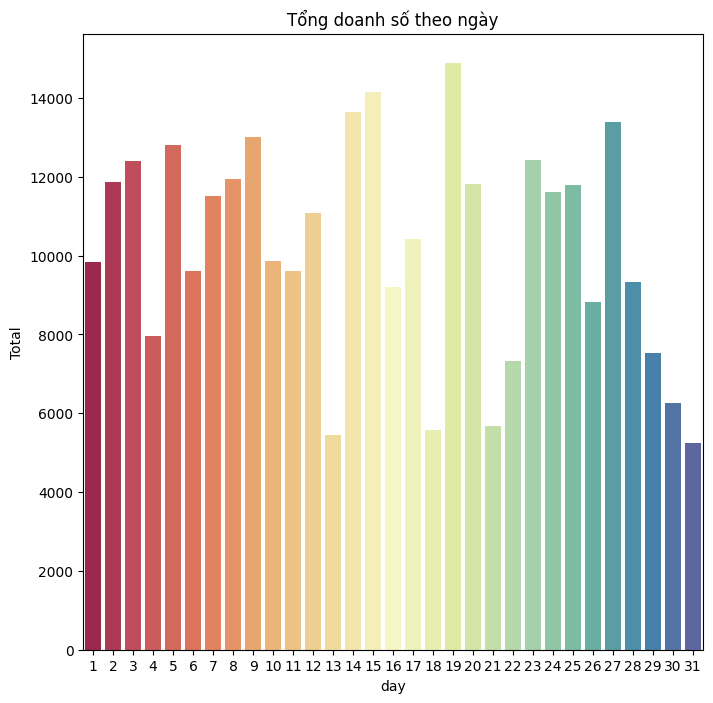

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x="day", y="Total", data=df, palette="Spectral", ci = None, estimator=sum, linewidth=0).set_title("Tổng doanh số theo ngày")
plt.show()

6. Tổng doanh số bán hàng theo buổi sáng, chiều, tối

In [ ]:
sales_by_time = df.groupby('Part_Of_The_Day')['Total'].sum().reset_index()
sales_by_time

,Part_Of_The_Day,Total
0,Afternoon,140256.480
1,Evening,87918.768
2,Morning,87864.693


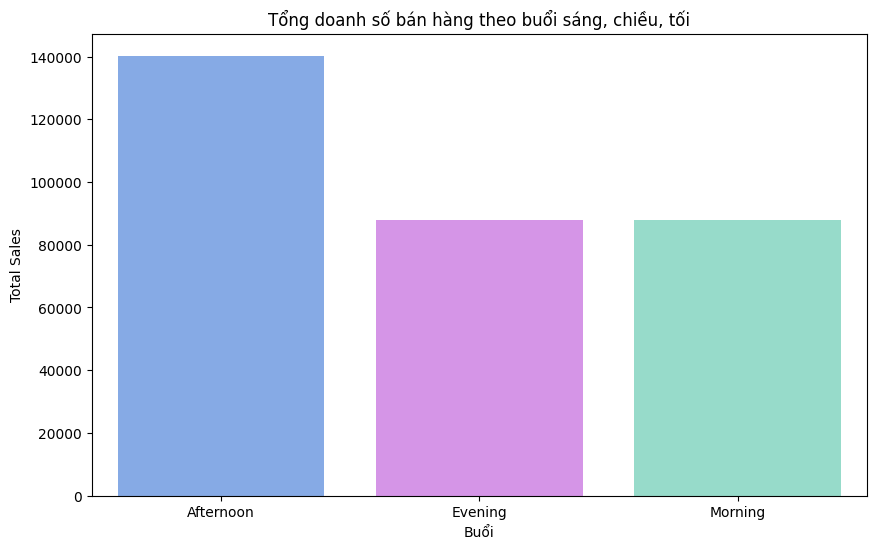

In [ ]:
sales_by_time = df.groupby('Part_Of_The_Day')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Part_Of_The_Day', y='Total', data=sales_by_time, palette=['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c', '#f0e195', '#f09595', '#fa9548'])
plt.title('Tổng doanh số bán hàng theo buổi sáng, chiều, tối')
plt.xlabel('Buổi')
plt.ylabel('Total Sales')
plt.show()

7. Doanh số các dòng sản phẩm theo tháng

In [ ]:
df.groupby('month')['Product line'].value_counts()

month     Product line          
February  Food and beverages        62
          Fashion accessories       60
          Electronic accessories    54
          Health and beauty         46
          Sports and travel         43
          Home and lifestyle        38
January   Sports and travel         70
          Fashion accessories       64
          Home and lifestyle        59
          Food and beverages        56
          Electronic accessories    54
          Health and beauty         49
March     Home and lifestyle        63
          Electronic accessories    62
          Health and beauty         57
          Food and beverages        56
          Fashion accessories       54
          Sports and travel         53
Name: Product line, dtype: int64

In [ ]:
total_revenue_by_month_and_product = df.groupby(['month', 'Product line'])['Total'].sum().reset_index()
print(total_revenue_by_month_and_product)

       month            Product line       Total
0   February  Electronic accessories  17362.9050
1   February     Fashion accessories  16668.7605
2   February      Food and beverages  20000.3580
3   February       Health and beauty  14602.2555
4   February      Home and lifestyle  12434.3835
5   February       Sports and travel  13809.6105
6    January  Electronic accessories  18831.2880
7    January     Fashion accessories  19345.1160
8    January      Food and beverages  18789.9180
9    January       Health and beauty  16383.1710
10   January      Home and lifestyle  18206.5590
11   January       Sports and travel  20918.7510
12     March  Electronic accessories  18143.3385
13     March     Fashion accessories  15950.9175
14     March      Food and beverages  16573.9560
15     March       Health and beauty  18208.3125
16     March      Home and lifestyle  20164.1475
17     March       Sports and travel  19646.1930


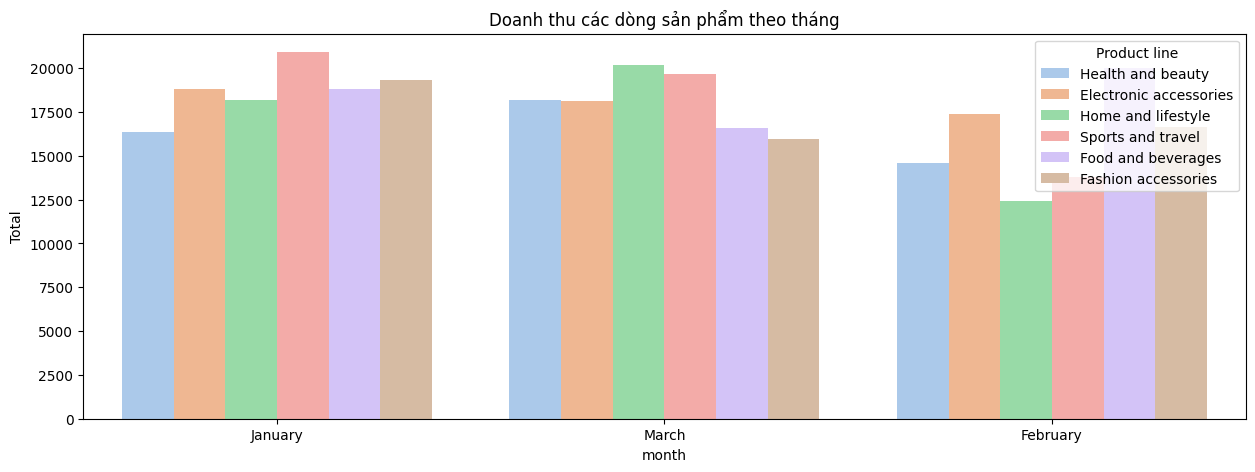

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x='month', y='Total', data=df, hue='Product line', palette='pastel', ci=None, estimator=sum)
plt.title('Doanh thu các dòng sản phẩm theo tháng')
plt.show()

**ĐÁNH GIÁ CỦA KHÁCH HÀNG**

1. Điểm đánh giá theo loại khách hàng

In [ ]:
customer_type_ratings = df.groupby('Customer type')['Rating'].mean()
print(customer_type_ratings)

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64


2. Đánh giá trung bình của các dòng sản phẩm

Kiểm định ANOVA 1 way

In [ ]:
data = df[['Product line','Rating']]
data.head(5)

,Product line,Rating
0,Health and beauty,9.1
1,Electronic accessories,9.6
2,Home and lifestyle,7.4
3,Health and beauty,8.4
4,Sports and travel,5.3


In [ ]:
#Kiểm định ANOVA 1_way liệu với các dòng sản phẩm khác nhau thì đánh giá của khách hàng có thay đổi theo không
Fashion_accessories=data[data['Product line']=='Fashion accessories']['Rating']
Food_beverages=data[data['Product line']=='Food and beverages']['Rating']
Electronic_accessories=data[data['Product line']=='Electronic accessories']['Rating']
Sports_travel=data[data['Product line']=='Sports and travel']['Rating']
Home_lifestyle=data[data['Product line']=='Home and lifestyle']['Rating']
Health_beauty=data[data['Product line']=='Health and beauty']['Rating']

f, p = st.f_oneway(Fashion_accessories, Food_beverages, Electronic_accessories, Home_lifestyle, Health_beauty)
print('H0:Không có sự thay đổi giữa các dòng sản phẩm')
print('Ha:Có sự thay đổi giữa các dòng sản phẩm')
alpha = 0.05
if (p < alpha):
  print(f'Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0')

else:
  print(f'Trị số p = {p:.4f} >= {alpha:.4f} không nên bác bỏ H0')

H0:Không có sự thay đổi giữa các dòng sản phẩm
Ha:Có sự thay đổi giữa các dòng sản phẩm
Trị số p = 0.6480 >= 0.0500 không nên bác bỏ H0


In [ ]:
#Tukey test( Hậu kiểm Tukey)
m_comp = pairwise_tukeyhsd(endog=data['Rating'],
                          groups=data['Product line'],
                          alpha=0.05)

print(m_comp)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1                group2       meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------------------
Electronic accessories Fashion accessories   0.1045 0.9931 -0.4223 0.6313  False
Electronic accessories  Food and beverages   0.1885 0.9127 -0.3413 0.7183  False
Electronic accessories   Health and beauty   0.0786 0.9985 -0.4698  0.627  False
Electronic accessories  Home and lifestyle  -0.0872 0.9974 -0.6283 0.4539  False
Electronic accessories   Sports and travel  -0.0084    1.0 -0.5445 0.5276  False
   Fashion accessories  Food and beverages    0.084 0.9975 -0.4397 0.6077  False
   Fashion accessories   Health and beauty  -0.0259    1.0 -0.5685 0.5166  False
   Fashion accessories  Home and lifestyle  -0.1917 0.9104 -0.7269 0.3435  False
   Fashion accessories   Sports and travel  -0.1129 0.9904  -0.643 0.4171  False
    Food and beverages   Hea

In [ ]:
product_line_ratings = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
product_line_ratings

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

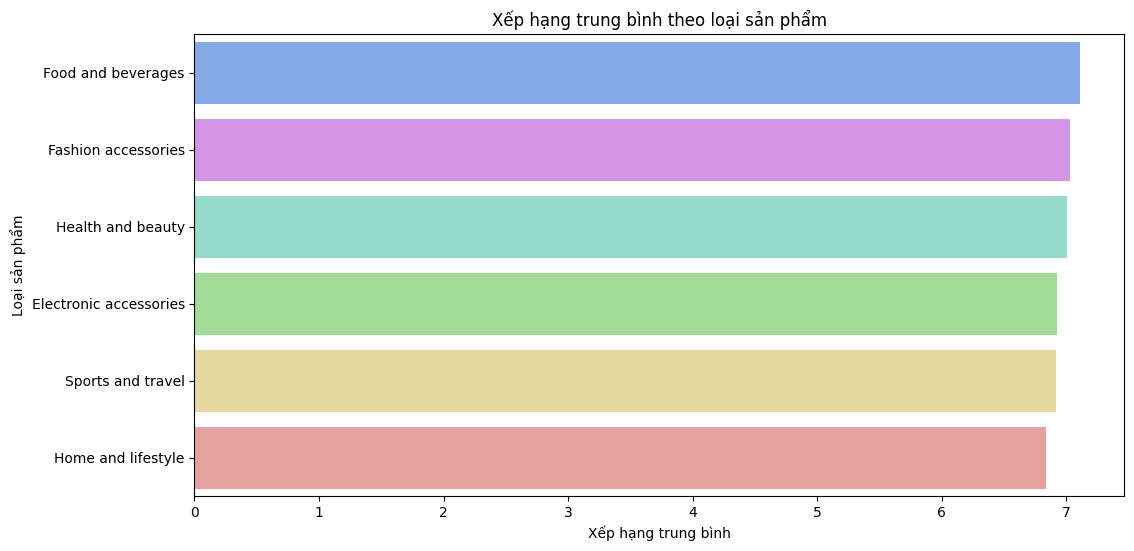

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=product_line_ratings.values, y=product_line_ratings.index, palette=['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c', '#f0e195', '#f09595', '#fa9548'])
plt.title('Xếp hạng trung bình theo loại sản phẩm')
plt.xlabel('Xếp hạng trung bình')
plt.ylabel('Loại sản phẩm')
plt.show()

3. Điểm đánh giá trung bình theo phương thức thanh toán

In [ ]:
payment_rating_avg = df.groupby('Payment')['Rating'].mean().sort_values(ascending=False)
payment_rating_avg

Payment
Credit card    7.003215
Cash           6.970058
Ewallet        6.947826
Name: Rating, dtype: float64

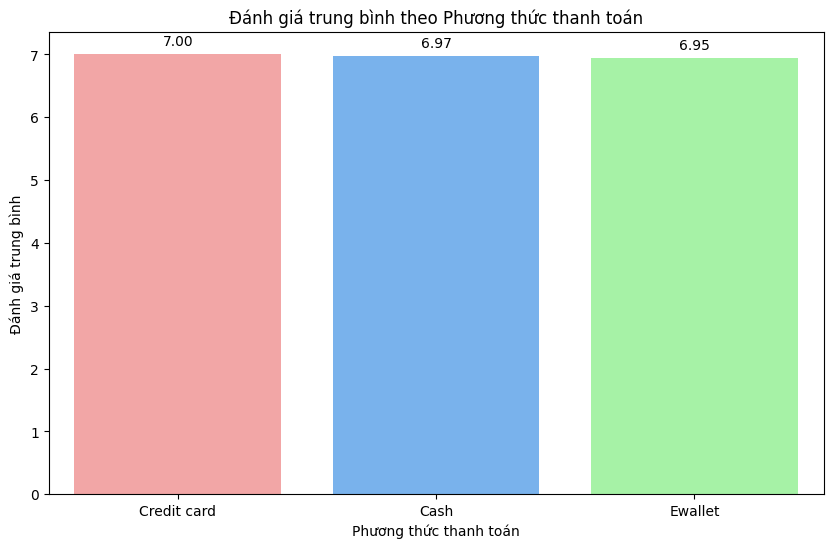

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99']
barplot = sns.barplot(x=payment_rating_avg.index, y=payment_rating_avg, palette=colors)
plt.title('Đánh giá trung bình theo Phương thức thanh toán')
plt.xlabel('Phương thức thanh toán')
plt.ylabel('Đánh giá trung bình')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

4. Mức độ đánh giá ('Rating') của các dòng sản phẩm khác nhau dựa trên giới tính ('Gender') của khách hàng

In [ ]:
rati = df.groupby(['Product line', 'Gender'])['Rating'].mean().sort_values(ascending=False).reset_index()
print(rati)

              Product line  Gender    Rating
0       Food and beverages  Female  7.203333
1        Health and beauty  Female  7.146875
2      Fashion accessories  Female  7.120833
3        Sports and travel    Male  7.084615
4   Electronic accessories    Male  7.059302
5       Food and beverages    Male  7.016667
6      Fashion accessories    Male  6.921951
7       Home and lifestyle    Male  6.909877
8        Health and beauty    Male  6.898864
9   Electronic accessories  Female  6.786905
10       Sports and travel  Female  6.767045
11      Home and lifestyle  Female  6.763291


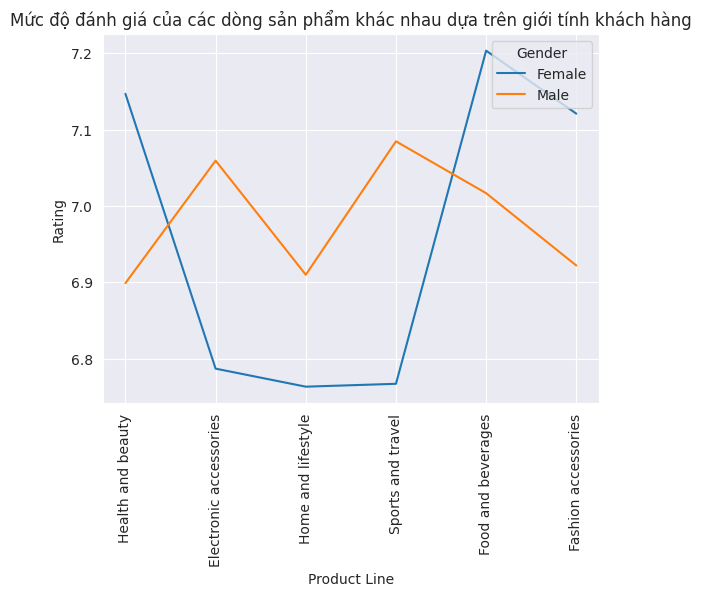

In [ ]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=df['Product line'],y=df['Rating'],data=df,hue=df['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Mức độ đánh giá của các dòng sản phẩm khác nhau dựa trên giới tính khách hàng')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

**XÂY DỰNG MÔ HÌNH PHÂN LỚP**

In [ ]:
sales = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Text(0.5, 1.0, 'BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT')

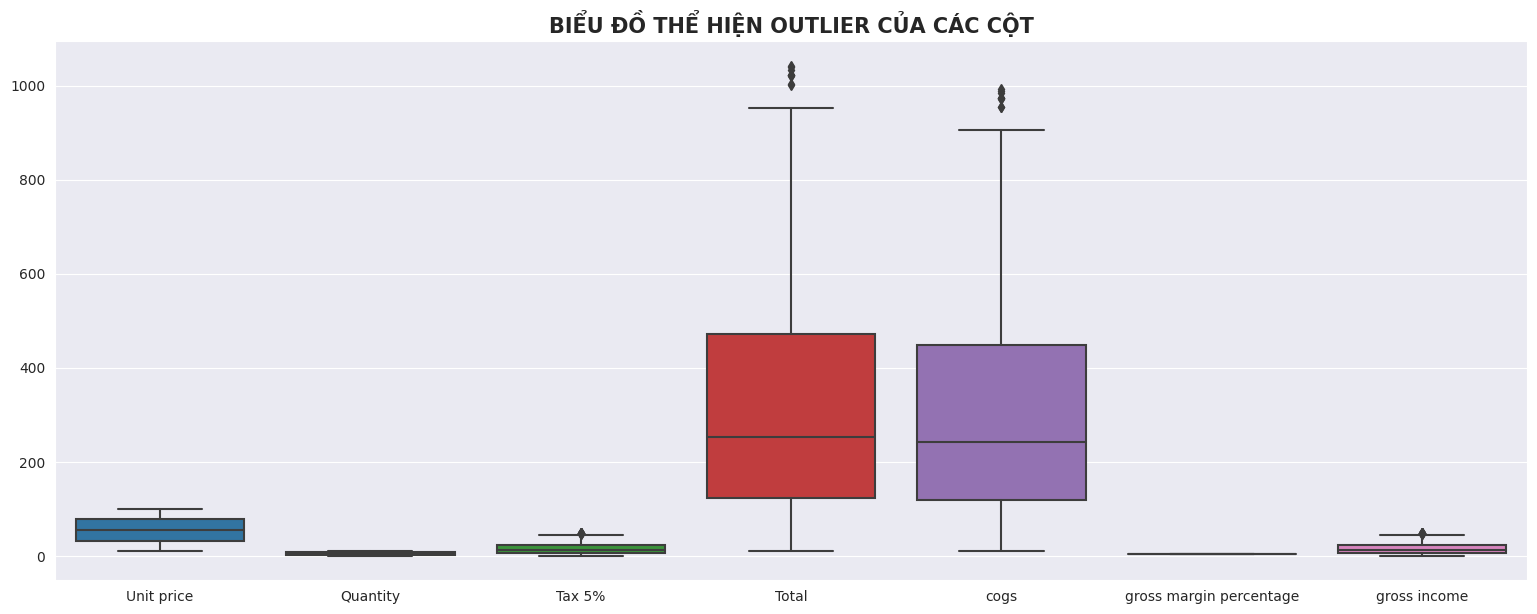

In [ ]:
%matplotlib inline
plt.subplots(figsize = (19,7))
sns.boxplot(data = numerical_features)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT', fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT SAU KHI ÁP DỤNG MIXMAXSCALER')

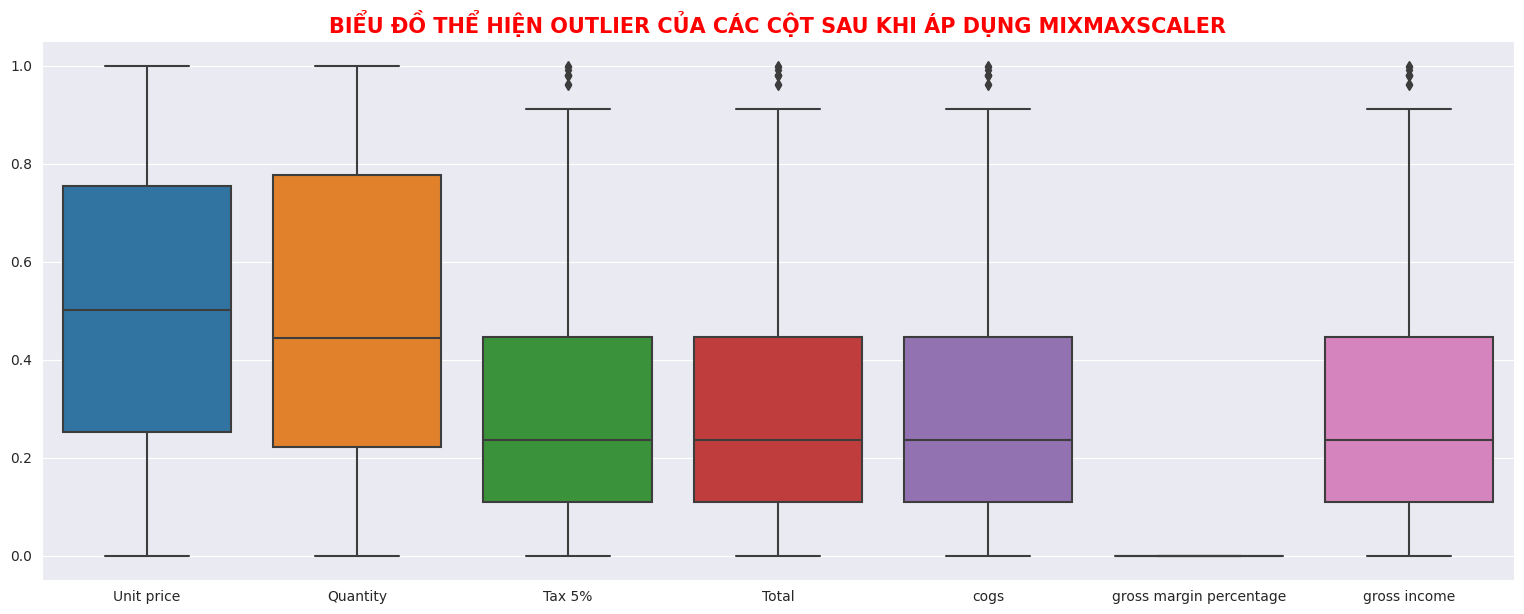

In [ ]:
# Chuẩn hóa dữ liệu bằng MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sa = scaler.fit_transform(numerical_features)
sd = pd.DataFrame(sa, columns = numerical_features.columns)
plt. subplots(figsize = (19,7))
sns.boxplot(data = sd)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT SAU KHI ÁP DỤNG MIXMAXSCALER', fontsize = 15, color = 'red', fontweight = 'bold')

In [ ]:
# Tính giới hạn trên
columns = numerical_features.columns
q1_list = []
q3_list = []
median_list = []
for c in columns:
  c1 = sales[c].quantile(.25)
  c2 = sales[c].quantile(.5)
  c3 = sales[c].quantile(.75)
  q1_list.append(c1)
  q3_list.append(c3)
  median_list.append(c2)

In [ ]:
upper_bound = [(x + (x - y) * 1.5) for x, y in zip(q3_list, q1_list)]
upper_bound

[145.525,
 15.5,
 47.2258125,
 991.7420625,
 944.5162500000001,
 4.761904762,
 47.2258125]

In [ ]:
# Kiểm tra và thay thế giá trị
i = 0
for c in columns:
  sales[c] = np.where(sales[c] > upper_bound[i], median_list[i], sales[c])
  i += 1

In [ ]:
sales.drop(axis = 1, columns = ['Time', 'Date', 'Invoice ID'], inplace = True)

In [ ]:
sales.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# discrete

bin_labels = ['Low', 'Medium', 'High']
sales['Rating'] = pd.cut(sales['Rating'], bins= 3, labels=bin_labels)

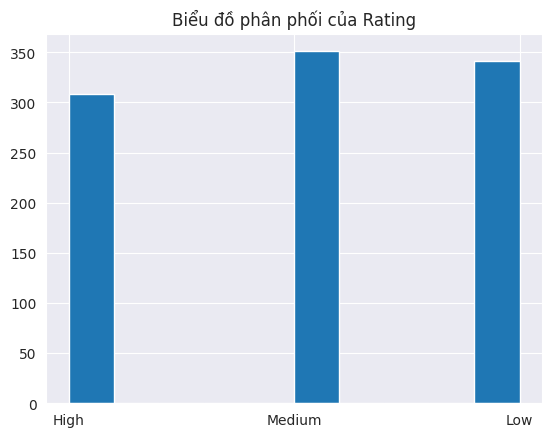

In [ ]:
plt.hist(sales['Rating'])
plt.title('Biểu đồ phân phối của Rating')
plt.show()

In [ ]:
# Tien xu ly
sales_dum = pd.get_dummies(sales.drop(axis = 1, columns = ['Rating']))
sales_dum['Rating'] = sales['Rating']
sales_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Unit price                           1000 non-null   float64 
 1   Quantity                             1000 non-null   float64 
 2   Tax 5%                               1000 non-null   float64 
 3   Total                                1000 non-null   float64 
 4   cogs                                 1000 non-null   float64 
 5   gross margin percentage              1000 non-null   float64 
 6   gross income                         1000 non-null   float64 
 7   Branch_A                             1000 non-null   uint8   
 8   Branch_B                             1000 non-null   uint8   
 9   Branch_C                             1000 non-null   uint8   
 10  City_Mandalay                        1000 non-null   uint8   
 11  City_Naypyitaw    

In [ ]:
sales_dum.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Branch_A,Branch_B,Branch_C,...,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating
0,74.69,7.0,26.1415,548.9715,522.83,4.761905,26.1415,1,0,0,...,0,0,0,1,0,0,0,0,1,High
1,15.28,5.0,3.8200,80.2200,76.40,4.761905,3.8200,0,0,1,...,1,0,0,0,0,0,1,0,0,High
2,46.33,7.0,16.2155,340.5255,324.31,4.761905,16.2155,1,0,0,...,0,0,0,0,1,0,0,1,0,Medium
3,58.22,8.0,23.2880,489.0480,465.76,4.761905,23.2880,1,0,0,...,0,0,0,1,0,0,0,0,1,High
4,86.31,7.0,30.2085,634.3785,604.17,4.761905,30.2085,1,0,0,...,0,0,0,0,0,1,0,0,1,Low


In [ ]:
X = sales_dum.drop(axis = 1, columns = ['Rating'])
y = sales_dum['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# LR
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
lr = classifier.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_true = y_test

precision = precision_score(y_true, y_pred, average='micro')
recall = recall_score(y_true, y_pred, average='micro')
f1 = f1_score(y_true, y_pred, average='micro')

print(f'Micro-average Precision: {precision:.4f}')
print(f'Micro-average Recall: {recall:.4f}')
print(f'Micro-average F1-score: {f1:.4f}')

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Đánh giá mô hình sử dụng cross-validation
results = cross_val_score(classifier, X, y, cv=kfold)

# In kết quả
print("Accuracy: %.2f%%" % (results.mean() * 100))

Micro-average Precision: 0.3250
Micro-average Recall: 0.3250
Micro-average F1-score: 0.3250
Accuracy: 30.90%


In [ ]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy') #entropy/gini
dTree = classifier.fit(X_train, y_train)
y_pred = dTree.predict(X_test)

y_true = y_test

precision = precision_score(y_true, y_pred, average='micro')
recall = recall_score(y_true, y_pred, average='micro')
f1 = f1_score(y_true, y_pred, average='micro')

print(f'Micro-average Precision: {precision:.4f}')
print(f'Micro-average Recall: {recall:.4f}')
print(f'Micro-average F1-score: {f1:.4f}')

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Đánh giá mô hình sử dụng cross-validation
results = cross_val_score(classifier, X, y, cv=kfold)

# In kết quả
print("Accuracy: %.2f%%" % (results.mean() * 100))

Micro-average Precision: 0.3050
Micro-average Recall: 0.3050
Micro-average F1-score: 0.3050
Accuracy: 37.20%


In [ ]:
# SVM
from sklearn import svm
classifier = svm.SVC()
svm = classifier.fit(X_train, y_train)
y_pred_svm_stratified = svm.predict(X_test)

y_true = y_test

precision = precision_score(y_true, y_pred, average='micro')
recall = recall_score(y_true, y_pred, average='micro')
f1 = f1_score(y_true, y_pred, average='micro')

print(f'Micro-average Precision: {precision:.4f}')
print(f'Micro-average Recall: {recall:.4f}')
print(f'Micro-average F1-score: {f1:.4f}')

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Đánh giá mô hình sử dụng cross-validation
results = cross_val_score(classifier, X, y, cv=kfold)

# In kết quả
print("Accuracy: %.2f%%" % (results.mean() * 100))

Micro-average Precision: 0.3050
Micro-average Recall: 0.3050
Micro-average F1-score: 0.3050
Accuracy: 35.20%
